In [2]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

"Задача: провести исследование по динамике изменения цен для новостроек и вторичного жилья
Методология расчета:

индексы цен на первичном и вторичном рынках жилья рассчитываются на основе зарегистрированных цен на вновь построенные квартиры и на квартиры функционирующего жилого фонда, находящегося в собственности, если они являются объектами совершения рыночных сделок.

Расчет индексов цен на рынке жилья за отчетный квартал определяется отношением стоимости определенного типа проданных квартир в ценах отчетного периода к стоимости квартир в ценах предыдущего периода.

В выгрузке представлена статистика из Федеральной Службы (www.fedstat.ru)
Необходимо проанализировать выгрузку и ответить на следующие вопросы:

1) В каком регионе быстрее всего меняется динамика индекса цен на вторичное жилье?

2) В каком классе (тип квартир) и на какой % сильнее всего изменилась стоимость на вторичном рынке?

3) В каком регионе быстрее всего меняется динамика индекса цен на новостройки?

4) В каком классе (тип квартир) и на какой % сильнее всего изменилась стоимость на первичное жилье?

Данные необходимо визуализировать, дать текстовые комментарии"

# Знакомство с данным

In [1592]:
# Какие данные содержатся в каждом столбце
df = pd.read_excel('data_price_dynamics.xls')
print(df["Индексы цен на рынке жилья (процент)"].unique(),'\n')
for i in range(1,14): print(df["Unnamed: "+str(i)+""].unique(),'\n')

df

[nan 'К соответствующему кварталу предыдущего года'
 'На конец квартала к концу IV квартала предыдущего года'
 'На конец квартала к концу предыдущего квартала'
 'Период с начала года к соответствующему периоду предыдущего года'] 

[nan 'Вторичный рынок жилья' 'Первичный рынок жилья'] 

[nan 'Российская Федерация' '    Центральный федеральный округ'
 '        Белгородская область' '        Брянская область'
 '        Владимирская область' '        Воронежская область'
 '        Ивановская область' '        Калужская область'
 '        Костромская область' '        Курская область'
 '        Липецкая область' '        Московская область'
 '        Орловская область' '        Рязанская область'
 '        Смоленская область' '        Тамбовская область'
 '        Тверская область' '        Тульская область'
 '        Ярославская область'
 '        Город Москва столица Российской Федерации город федерального значения'
 '    Северо-Западный федеральный округ' '        Республика Карелия'
 ' 

,Индексы цен на рынке жилья (процент),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,2019,NaN,NaN,NaN,2020,NaN
2,NaN,NaN,NaN,NaN,I квартал,II квартал,III квартал,IV квартал,I квартал,II квартал,III квартал,IV квартал,I квартал,II квартал
3,К соответствующему кварталу предыдущего года,Вторичный рынок жилья,Российская Федерация,Все типы квартир,99.51,100.62,102.11,104.09,104.41,104.04,105.03,103.78,102.73,NaN
4,К соответствующему кварталу предыдущего года,Вторичный рынок жилья,Российская Федерация,Квартиры среднего качества (типовые),100.53,100.98,103.01,104.27,104.75,104.96,104.68,104.3,102.26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,Период с начала года к соответствующему период...,Первичный рынок жилья,Сахалинская область,Все типы квартир,106.66,108.54,110.97,113.74,129.42,123.07,119.41,115.27,102.58,NaN
3147,Период с начала года к соответствующему период...,Первичный рынок жилья,Сахалинская область,Квартиры среднего качества (типовые),98.73,99.48,100.19,100.79,99.68,98.42,103.47,105.91,107.49,NaN
3148,Период с начала года к соответствующему период...,Первичный рынок жилья,Сахалинская область,Улучшенного качества,108,110.06,112.78,115.88,134.2,127.03,121.87,116.66,102.5,NaN
3149,Период с начала года к соответствующему период...,Первичный рынок жилья,Еврейская автономная область,Все типы квартир,91.03,92.9,95.55,98.32,111.95,110.4,108,105.52,96.08,NaN


In [1600]:
# Сколько субъектов РФ?
print(df["Unnamed: 2"].nunique())


95


In [160]:
#Таблица при выгрузке сместилась, необходимы корректировки

df = pd.read_excel('data_price_dynamics.xls')
df=df.drop(index=[0,1,2])
df=df.rename(columns={'Индексы цен на рынке жилья (процент)': 'Price_index',
                                                  'Unnamed: 1':'Market_type',
                                                  'Unnamed: 2':'Location',
                                                  'Unnamed: 3':'Flat_type',})

df=df.set_index(["Price_index", 
                 "Market_type",
                 "Location",
                 "Flat_type"])

df.rename(columns={'Unnamed: 4':'_1_quarter',
                    'Unnamed: 5':'_2_quarter',
                    'Unnamed: 6':'_3_quarter',
                    'Unnamed: 7':'_4_quarter',
                    'Unnamed: 8':'_1_quarter',
                    'Unnamed: 9':'_2_quarter',
                    'Unnamed: 10':'_3_quarter',
                    'Unnamed: 11':'_4_quarter',
                    'Unnamed: 12':'_1_quarter',
                    'Unnamed: 13':'_2_quarter'}, inplace=True)

arrays = [['_2018','_2018','_2018','_2018',
            '_2019','_2019','_2019','_2019',
            '_2020','_2020'], df.columns]
df.columns = pd.MultiIndex.from_arrays(arrays)

df

_2018  \
                                                                                                                                                   _1_quarter   
Price_index                                        Market_type           Location                             Flat_type                                         
К соответствующему кварталу предыдущего года       Вторичный рынок жилья Российская Федерация                 Все типы квартир                          99.51   
                                                                                                              Квартиры среднего качества (типовые)     100.53   
                                                                                                              Низкого качества                          99.22   
                                                                                                              Улучшенного качества                      98.35   
                                                                                                              Элитные квартиры                         101.73   
...                                                                                                                                                       ...   
Период с начала года к соответствующему периоду... Первичный рынок жилья         Сахалинская область          Все типы квартир                         106.66   
                                                                                                              Квартиры среднего качества (типовые)      98.73   
                                                                                                              Улучшенного качества                        108   
                                                                                 Еврейская автономная область Все типы квартир                          91.03   
                                                                                                              Улучшенного качества                      91.03   

                                                                                                                                                               \
                                                                                                                                                   _2_quarter   
Price_index                                        Market_type           Location                             Flat_type                                         
К соответствующему кварталу предыдущего года       Вторичный рынок жилья Российская Федерация                 Все типы квартир                         100.62   
                                                                                                              Квартиры среднего качества (типовые)     100.98   
                                                                                                              Низкого качества                         100.82   
                                                                                                              Улучшенного качества                      100.1   
                                                                                                              Элитные квартиры                         101.73   
...                                                                                                                                                       ...   
Период с начала года к соответствующему периоду... Первичный рынок жилья         Сахалинская область          Все типы квартир                         108.54   
                                                                                                              Квартиры среднего качества (типовые)      99.48   
                                                                                                              Улучшенного каче

In [167]:
df = pd.read_excel('data_price_dynamics.xls')
df=df.drop(index=[0,1,2])
df=df.reset_index().drop(columns='index')

df.rename(columns={'Индексы цен на рынке жилья (процент)':'',
                   'Unnamed: 1':'',
                   'Unnamed: 2':'',
                   'Unnamed: 3':'',
                    'Unnamed: 4':'_1_quarter',
                    'Unnamed: 5':'_2_quarter',
                    'Unnamed: 6':'_3_quarter',
                    'Unnamed: 7':'_4_quarter',
                    'Unnamed: 8':'_1_quarter',
                    'Unnamed: 9':'_2_quarter',
                    'Unnamed: 10':'_3_quarter',
                    'Unnamed: 11':'_4_quarter',
                    'Unnamed: 12':'_1_quarter',
                    'Unnamed: 13':'_2_quarter'}, inplace=True)

arrays = [['Price_index','Market_type','Location','Flat_type',
            '_2018','_2018','_2018','_2018',
            '_2019','_2019','_2019','_2019',
            '_2020','_2020'], df.columns]
df.columns = pd.MultiIndex.from_arrays(arrays)

df

Price_index  \
                                                          
0          К соответствующему кварталу предыдущего года   
1          К соответствующему кварталу предыдущего года   
2          К соответствующему кварталу предыдущего года   
3          К соответствующему кварталу предыдущего года   
4          К соответствующему кварталу предыдущего года   
...                                                 ...   
3143  Период с начала года к соответствующему период...   
3144  Период с начала года к соответствующему период...   
3145  Период с начала года к соответствующему период...   
3146  Период с начала года к соответствующему период...   
3147  Период с начала года к соответствующему период...   

                Market_type                              Location  \
                                                                    
0     Вторичный рынок жилья                  Российская Федерация   
1     Вторичный рынок жилья                  Российская Федерация   
2     Вторичный рынок жилья                  Российская Федерация   
3     Вторичный рынок жилья                  Российская Федерация   
4     Вторичный рынок жилья                  Российская Федерация   
...                     ...                                   ...   
3143  Первичный рынок жилья                   Сахалинская область   
3144  Первичный рынок жилья                   Сахалинская область   
3145  Первичный рынок жилья                   Сахалинская область   
3146  Первичный рынок жилья          Еврейская автономная область   
3147  Первичный рынок жилья          Еврейская автономная область   

                                 Flat_type      _2018                        \
                                           _1_quarter _2_quarter _3_quarter   
0                         Все типы квартир      99.51     100.62     102.11   
1     Квартиры среднего качества (типовые)     100.53     100.98     103.01   
2                         Низкого качества      99.22     100.82      103.1   
3                     Улучшенного качества      98.35      100.1     100.97   
4                         Элитные квартиры     101.73     101.73     102.79   
...                                    ...        ...        ...        ...   
3143                      Все типы квартир     106.66     108.54     110.97   
3144  Квартиры среднего качества (типовые)      98.73      99.48     100.19   
3145                  Улучшенного качества        108     110.06     112.78   
3146                      Все типы квартир      91.03       92.9      95.55   
3147                  Улучшенного качества      91.03       92.9      95.55   

                     _2019                                       _2020  \
     _4_quarter _1_quarter _2_quarter _3_quarter _4_quarter _1_quarter   
0        104.09     104.41     104.04     105.03     103.78     102.73   
1        104.27     104.75     104.96     104.68      104.3     102.26   
2        105.35     105.03      104.1     103.82     102.37     103.33   
3        103.87     104.84     104.22     106.41     104.07     103.28   
4        102.21      98.53      97.38      99.48     100.62      101.7   
...         ...        ...        ...        ...        ...        ...   
3143     113.74     129.42     123.07     119.41     115.27     102.58   
3144     100.79      99.68      98.42     103.47     105.91     107.49   
3145     115.88      134.2     127.03     121.87     116.66      102.5   
3146      98.32     111.95      110.4        108     105.52      96.08   
3147      98.32     111.95      110.4        108     105.52      96.08   

                 
     _2_quarter  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
3143        NaN  
3144        NaN  
3145        NaN  
3146        NaN  
3147        NaN  

[3148 rows x 14 columns]

# 1) В каком регионе быстрее всего меняется динамика индекса цен на вторичное жилье?


# Ошибка в данных Вторички

In [1475]:
df_second_market= pd.read_excel('data_price_dynamics.xls')
df_second_market=df_second_market.drop(index=[0,1,2])

df_second_market=df_second_market.rename(columns={'Индексы цен на рынке жилья (процент)': 'Price_index',
                                                  'Unnamed: 1':'Market_type',
                                                  'Unnamed: 2':'Location',
                                                  'Unnamed: 3':'Flat_type',
                                                   'Unnamed: 4':'2018_1_quarter',
                                                    'Unnamed: 5':'2018_2_quarter',
                                                    'Unnamed: 6':'2018_3_quarter',
                                                    'Unnamed: 7':'2018_4_quarter',
                                                    'Unnamed: 8':'2019_1_quarter',
                                                    'Unnamed: 9':'2019_2_quarter',
                                                    'Unnamed: 10':'2019_3_quarter',
                                                    'Unnamed: 11':'2019_4_quarter',
                                                    'Unnamed: 12':'2020_1_quarter',
                                                    'Unnamed: 13':'2020_2_quarter'})
# Датафрейм по вторичному рынку
df_second_market=df_second_market[df_second_market['Market_type']=='Вторичный рынок жилья'].drop(columns='Market_type')

In [1476]:
# Оставим тип "Все типы квартир	"
df_second_market_Flat_type_all=df_second_market[df_second_market['Flat_type']=='Все типы квартир'].drop(columns='Flat_type')

Ошибка 95*4=380 <br>
А строк  388!

In [1477]:
df_second_market_Flat_type_all.Location.nunique()

95

In [1478]:
df_second_market_Flat_type_all.Price_index.nunique()

4

In [1479]:
df_second_market_Flat_type_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 3 to 2804
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price_index     388 non-null    object
 1   Location        388 non-null    object
 2   2018_1_quarter  376 non-null    object
 3   2018_2_quarter  376 non-null    object
 4   2018_3_quarter  376 non-null    object
 5   2018_4_quarter  378 non-null    object
 6   2019_1_quarter  380 non-null    object
 7   2019_2_quarter  380 non-null    object
 8   2019_3_quarter  380 non-null    object
 9   2019_4_quarter  380 non-null    object
 10  2020_1_quarter  380 non-null    object
 11  2020_2_quarter  95 non-null     object
dtypes: object(12)
memory usage: 39.4+ KB


Ищем строки записей которых больше чем ожидалось. СМОТРЮ НАЗВАНИЯ РЕГИОНОВ

In [1480]:
loc=df_second_market_Flat_type_all.Location.unique()
for l in loc:
#     print(df_second_market_Flat_type_all[df_second_market_Flat_type_all['Location']==str(l)][['Location']])
      if len(df_second_market_Flat_type_all[df_second_market_Flat_type_all['Location']==str(l)][['Location']])!=4:
        print(df_second_market_Flat_type_all[df_second_market_Flat_type_all['Location']==str(l)][['Location']])

                             Location
340       Сибирский федеральный округ
345       Сибирский федеральный округ
1127      Сибирский федеральный округ
1132      Сибирский федеральный округ
1914      Сибирский федеральный округ
1919      Сибирский федеральный округ
2701      Сибирский федеральный округ
2706      Сибирский федеральный округ
                                   Location
396       Дальневосточный федеральный округ
401       Дальневосточный федеральный округ
1183      Дальневосточный федеральный округ
1188      Дальневосточный федеральный округ
1970      Дальневосточный федеральный округ
1975      Дальневосточный федеральный округ
2757      Дальневосточный федеральный округ
2762      Дальневосточный федеральный округ


In [1481]:
# Смотрим в чем дело 1
df_second_market_Flat_type_all[df_second_market_Flat_type_all['Location']=='    Дальневосточный федеральный округ']

,Price_index,Location,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
396,К соответствующему кварталу предыдущего года,Дальневосточный федеральный округ,96.76,100.71,103.88,107.59,NaN,NaN,NaN,NaN,NaN,NaN
401,К соответствующему кварталу предыдущего года,Дальневосточный федеральный округ,NaN,NaN,NaN,NaN,109.16,109.13,109.19,107.78,108.68,NaN
1183,На конец квартала к концу IV квартала предыдущ...,Дальневосточный федеральный округ,100.17,102.65,104.25,107.59,NaN,NaN,NaN,NaN,NaN,NaN
1188,На конец квартала к концу IV квартала предыдущ...,Дальневосточный федеральный округ,NaN,NaN,NaN,NaN,101.35,103.21,105.76,107.78,100.63,NaN
1970,На конец квартала к концу предыдущего квартала,Дальневосточный федеральный округ,100.17,102.47,101.56,103.21,NaN,NaN,NaN,NaN,NaN,NaN
1975,На конец квартала к концу предыдущего квартала,Дальневосточный федеральный округ,NaN,NaN,NaN,103.32,101.35,101.83,102.47,101.91,100.63,101.97
2757,Период с начала года к соответствующему период...,Дальневосточный федеральный округ,96.76,98.72,100.41,102.18,NaN,NaN,NaN,NaN,NaN,NaN
2762,Период с начала года к соответствующему период...,Дальневосточный федеральный округ,NaN,NaN,NaN,NaN,109.16,109.14,109.16,108.8,108.68,NaN


In [1482]:
# Смотрим в чем дело 2
df_second_market_Flat_type_all[df_second_market_Flat_type_all['Location']=='    Сибирский федеральный округ']

,Price_index,Location,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
340,К соответствующему кварталу предыдущего года,Сибирский федеральный округ,101.72,103.05,103.25,105.89,NaN,NaN,NaN,NaN,NaN,NaN
345,К соответствующему кварталу предыдущего года,Сибирский федеральный округ,NaN,NaN,NaN,NaN,105.91,105.54,106.1,104.98,105.13,NaN
1127,На конец квартала к концу IV квартала предыдущ...,Сибирский федеральный округ,101.12,102.09,102.64,105.89,NaN,NaN,NaN,NaN,NaN,NaN
1132,На конец квартала к концу IV квартала предыдущ...,Сибирский федеральный округ,NaN,NaN,NaN,NaN,101.5,102.07,103.21,104.98,100.47,NaN
1914,На конец квартала к концу предыдущего квартала,Сибирский федеральный округ,101.12,100.96,100.54,103.17,NaN,NaN,NaN,NaN,NaN,NaN
1919,На конец квартала к концу предыдущего квартала,Сибирский федеральный округ,NaN,NaN,NaN,103.13,101.5,100.56,101.11,101.71,100.47,100.85
2701,Период с начала года к соответствующему период...,Сибирский федеральный округ,101.72,102.38,102.67,103.48,NaN,NaN,NaN,NaN,NaN,NaN
2706,Период с начала года к соответствующему период...,Сибирский федеральный округ,NaN,NaN,NaN,NaN,105.91,105.72,105.85,105.63,105.13,NaN


In [1483]:
# Собираем все строки в одни с верными значениям
def fix(df_to_fix):
    first=df_to_fix.loc[df_to_fix.index[0]]
    second=df_to_fix.loc[df_to_fix.index[1]]
    #Запоминаем где nan
    to_insted=[]
    for i in range(2,len(list(first))):
        if (np.isnan(list(first)[i])):
            to_insted.append(i)
    new_first=df_to_fix.loc[df_to_fix.index[0]]
    new_first=new_first.values
    #Заменяем nan нормальными значениями
    for i in to_insted:
        new_first[i]=list(second)[i]
    return (new_first[2:])


#ВХОД
# Определяем проблемные локоции которые фиксим
for Location_Name in ['    Дальневосточный федеральный округ','    Сибирский федеральный округ']:
    fixed=df_second_market_Flat_type_all[df_second_market_Flat_type_all['Location']==Location_Name].groupby('Price_index').apply(func=fix)

    df_buf=pd.DataFrame(fixed,columns=['value'])
    df_buf=df_buf.reset_index()
    df_buf[['2018_1_quarter', '2018_2_quarter', '2018_3_quarter', '2018_4_quarter',
                             '2019_1_quarter', '2019_2_quarter', '2019_3_quarter', '2019_4_quarter',
                             '2020_1_quarter', '2020_2_quarter']] = pd.DataFrame(df_buf.value.values.tolist(), index= df_buf.index)
    df_buf=df_buf.drop(columns=['value'])

    # Процедура замены
    repeats=df_second_market_Flat_type_all[df_second_market_Flat_type_all['Location']==Location_Name]
    repeats_ind=repeats.index
    # Удаляем дублирующиеся строки 
    df_second_market_Flat_type_all=df_second_market_Flat_type_all.drop(index=repeats_ind[1::2])
    # Чиним (дозаполняем) оставшиеся строки
    k=0
    for i in repeats_ind[::2]:
        df_second_market_Flat_type_all.loc[i, '2018_1_quarter':'2020_2_quarter']=df_buf.loc[k, '2018_1_quarter':'2020_2_quarter']
        k=k+1 # это индекс в буферном датафрейме с верными значениями

In [1484]:
# Проверяем результат 1
df_second_market_Flat_type_all[df_second_market_Flat_type_all['Location']=='    Дальневосточный федеральный округ']

,Price_index,Location,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
396,К соответствующему кварталу предыдущего года,Дальневосточный федеральный округ,96.76,100.71,103.88,107.59,109.16,109.13,109.19,107.78,108.68,NaN
1183,На конец квартала к концу IV квартала предыдущ...,Дальневосточный федеральный округ,100.17,102.65,104.25,107.59,101.35,103.21,105.76,107.78,100.63,NaN
1970,На конец квартала к концу предыдущего квартала,Дальневосточный федеральный округ,100.17,102.47,101.56,103.21,101.35,101.83,102.47,101.91,100.63,101.97
2757,Период с начала года к соответствующему период...,Дальневосточный федеральный округ,96.76,98.72,100.41,102.18,109.16,109.14,109.16,108.8,108.68,NaN


In [1485]:
# Проверяем результат 2
df_second_market_Flat_type_all[df_second_market_Flat_type_all['Location']=='    Сибирский федеральный округ']

,Price_index,Location,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
340,К соответствующему кварталу предыдущего года,Сибирский федеральный округ,101.72,103.05,103.25,105.89,105.91,105.54,106.1,104.98,105.13,NaN
1127,На конец квартала к концу IV квартала предыдущ...,Сибирский федеральный округ,101.12,102.09,102.64,105.89,101.5,102.07,103.21,104.98,100.47,NaN
1914,На конец квартала к концу предыдущего квартала,Сибирский федеральный округ,101.12,100.96,100.54,103.17,101.5,100.56,101.11,101.71,100.47,100.85
2701,Период с начала года к соответствующему период...,Сибирский федеральный округ,101.72,102.38,102.67,103.48,105.91,105.72,105.85,105.63,105.13,NaN


In [1486]:
df_second_market_Flat_type_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 3 to 2804
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price_index     380 non-null    object
 1   Location        380 non-null    object
 2   2018_1_quarter  376 non-null    object
 3   2018_2_quarter  376 non-null    object
 4   2018_3_quarter  376 non-null    object
 5   2018_4_quarter  376 non-null    object
 6   2019_1_quarter  380 non-null    object
 7   2019_2_quarter  380 non-null    object
 8   2019_3_quarter  380 non-null    object
 9   2019_4_quarter  380 non-null    object
 10  2020_1_quarter  380 non-null    object
 11  2020_2_quarter  95 non-null     object
dtypes: object(12)
memory usage: 48.6+ KB


Все исправлено!

In [1487]:
df_second_market_Flat_type_all

,Price_index,Location,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
3,К соответствующему кварталу предыдущего года,Российская Федерация,99.51,100.62,102.11,104.09,104.41,104.04,105.03,103.78,102.73,NaN
8,К соответствующему кварталу предыдущего года,Центральный федеральный округ,97.28,99.07,100.49,102.35,104.07,102.69,106.52,102.14,99.11,NaN
13,К соответствующему кварталу предыдущего года,Белгородская область,99.84,99.37,99.44,102.03,103.14,104.57,103.72,100.74,98.65,NaN
17,К соответствующему кварталу предыдущего года,Брянская область,93.09,96.52,96.96,97.15,97.05,97.99,101.32,102.25,107.8,NaN
22,К соответствующему кварталу предыдущего года,Владимирская область,105.48,104.56,106.43,106.96,106.11,106.32,103.32,101.22,100.59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2787,Период с начала года к соответствующему период...,Хабаровский край,95.08,96.74,99.03,101.56,109.07,109.9,109.34,108.28,109.76,NaN
2792,Период с начала года к соответствующему период...,Амурская область,102.48,102.57,104.26,106.19,108.04,109.23,109.23,109.97,113.48,NaN
2796,Период с начала года к соответствующему период...,Магаданская область,88.18,92.17,94.85,96.43,104.6,103.73,102.35,103.27,106.13,NaN
2799,Период с начала года к соответствующему период...,Сахалинская область,100.21,105.07,106.44,107.51,109.47,105.88,104.84,104.75,109.92,NaN


# Регрессия для вторички

In [1488]:
# Динамика через регрессию
def linregress(x, y, w=None, b=None):
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    if w is None:
        w = np.ones(x.size, dtype=np.float64)
    wxy = np.sum(w*y*x)
    wx = np.sum(w*x)
    wy = np.sum(w*y)
    wx2 = np.sum(w*x*x)
    sw = np.sum(w)
    den = wx2*sw - wx*wx
    if den == 0:
        den = np.finfo(np.float64).eps
    if b is None:
        k = (sw*wxy - wx*wy) / den
        b = (wy - k*wx) / sw
    else:
        k = (wxy - wx*b) / wx2
    return k, b

# Считаем динамику индексов
def f(df_f):    
    #Множество типов индексов
    types_of_price_index=['К соответствующему кварталу предыдущего года',
                                   'На конец квартала к концу IV квартала предыдущего года',
                                   'На конец квартала к концу предыдущего квартала',
                                   'Период с начала года к соответствующему периоду предыдущего года']
    #Готовим фрейм который отдадим из функции
    df_return= pd.DataFrame(index=types_of_price_index,
                           columns=['coef_dinamic_index'])
    #Ищем коэфициент динамики изменения для кажого типа индекса
    for t in types_of_price_index:
        price_index=df_f[df_f.Price_index==t].values
        #Берем значения индексов откидывая название области и типа индекса
        index_meaning=price_index[0][2:]
        #Убираем nan если есть
        to_del=[]
        for i in range(len(index_meaning)):
            if (np.isnan(index_meaning[i])):
                to_del.append(i)
        index_meaning = np.delete(index_meaning, to_del)
        #Ищем коэф регресии
        lin_reg=linregress(range(len(index_meaning)),index_meaning)
        #Запись ответа. Пишем коэф K (kx+b)
        df_return.loc[t,'coef_dinamic_index']=round(lin_reg[0],2)
    return df_return

df_dinamic_index=df_second_market_Flat_type_all.groupby('Location').apply(func=f)

!!!!!!!!!!!!
                                            Price_index  \
116        К соответствующему кварталу предыдущего года   
903   На конец квартала к концу IV квартала предыдущ...   
1690     На конец квартала к концу предыдущего квартала   
2477  Период с начала года к соответствующему период...   

                                               Location 2018_1_quarter  \
116               Архангельская область (кроме Ненец...          99.42   
903               Архангельская область (кроме Ненец...          99.48   
1690              Архангельская область (кроме Ненец...          99.48   
2477              Архангельская область (кроме Ненец...          99.42   

     2018_2_quarter 2018_3_quarter 2018_4_quarter 2019_1_quarter  \
116          100.63         100.02         101.99         104.47   
903          100.45         100.16         101.99         102.11   
1690         100.98          99.71         101.82         102.11   
2477         100.02         100.02         100.5







                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     0.82
На конец квартала к концу IV квартала предыдуще...               0.42
На конец квартала к концу предыдущего квартала                   0.08
Период с начала года к соответствующему периоду...               0.83
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
121        К соответствующему кварталу предыдущего года   
908   На конец квартала к концу IV квартала предыдущ...   
1695     На конец квартала к концу предыдущего квартала   
2482  Период с начала года к соответствующему период...   

                         Location 2018_1_quarter 2018_2_quarter  \
121           Вологодская область          98.41          99.66   
908           Вологодская область         100.45          98.77   
1695          Вологодская область         100.45          98.34   
2482          Вологодская область          98.41      



                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                    -0.82
На конец квартала к концу IV квартала предыдуще...               -0.1
На конец квартала к концу предыдущего квартала                   0.24
Период с начала года к соответствующему периоду...              -0.61
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
126        К соответствующему кварталу предыдущего года   
913   На конец квартала к концу IV квартала предыдущ...   
1700     На конец квартала к концу предыдущего квартала   
2487  Период с начала года к соответствующему период...   

                             Location 2018_1_quarter 2018_2_quarter  \
126           Калининградская область         101.56         101.25   
913           Калининградская область         100.29         100.45   
1700          Калининградская область         100.29         100.16   
2487          Калининградская область     









                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     0.36
На конец квартала к концу IV квартала предыдуще...               0.33
На конец квартала к концу предыдущего квартала                   0.01
Период с начала года к соответствующему периоду...               0.43
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
49         К соответствующему кварталу предыдущего года   
836   На конец квартала к концу IV квартала предыдущ...   
1623     На конец квартала к концу предыдущего квартала   
2410  Период с начала года к соответствующему период...   

                      Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
49            Липецкая область         101.74         103.76         101.11   
836           Липецкая область         100.62         101.31         101.23   
1623          Липецкая область         100.62         100.69          99.93   
2410

2625          92.91         101.23            NaN  








                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                    -1.09
На конец квартала к концу IV квартала предыдуще...              -0.98
На конец квартала к концу предыдущего квартала                   0.13
Период с начала года к соответствующему периоду...              -1.03
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
421        К соответствующему кварталу предыдущего года   
1208  На конец квартала к концу IV квартала предыдущ...   
1995     На конец квартала к концу предыдущего квартала   
2782  Период с начала года к соответствующему период...   

                     Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
421           Приморский край          99.55         102.42         103.44   
1208          Приморский край         100.31         103.12         104.01   
1995          Приморский край     









                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                    -0.53
На конец квартала к концу IV квартала предыдуще...               -0.3
На конец квартала к концу предыдущего квартала                  -0.02
Период с начала года к соответствующему периоду...               -0.4
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
104        К соответствующему кварталу предыдущего года   
891   На конец квартала к концу IV квартала предыдущ...   
1678     На конец квартала к концу предыдущего квартала   
2465  Период с начала года к соответствующему период...   

                     Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
104           Республика Коми          97.58          96.28          96.54   
891           Республика Коми          98.31          97.44          97.16   
1678          Республика Коми          98.31          99.11          99.72   
2465    





                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     0.72
На конец квартала к концу IV квартала предыдуще...                0.4
На конец квартала к концу предыдущего квартала                   0.13
Период с начала года к соответствующему периоду...               0.67
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
63         К соответствующему кварталу предыдущего года   
850   На конец квартала к концу IV квартала предыдущ...   
1637     На конец квартала к концу предыдущего квартала   
2424  Период с начала года к соответствующему период...   

                       Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
63            Рязанская область         103.85         103.82         101.93   
850           Рязанская область           98.7          99.71          98.26   
1637          Рязанская область           98.7         101.02          98.54   
2424









                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     0.46
На конец квартала к концу IV квартала предыдуще...               0.45
На конец квартала к концу предыдущего квартала                    0.2
Период с начала года к соответствующему периоду...               0.54
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
80         К соответствующему кварталу предыдущего года   
867   На конец квартала к концу IV квартала предыдущ...   
1654     На конец квартала к концу предыдущего квартала   
2441  Период с начала года к соответствующему период...   

                      Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
80            Тульская область         102.26          102.7         105.71   
867           Тульская область         101.08         100.23         104.69   
1654          Тульская область         101.08          99.16         104.46   
2441

                                            Price_index  \
259        К соответствующему кварталу предыдущего года   
1046  На конец квартала к концу IV квартала предыдущ...   
1833     На конец квартала к концу предыдущего квартала   
2620  Период с начала года к соответствующему период...   

                                    Location 2018_1_quarter 2018_2_quarter  \
259           Чувашская Республика - Чувашия          94.08           95.2   
1046          Чувашская Республика - Чувашия          96.12           95.9   
1833          Чувашская Республика - Чувашия          96.12          99.77   
2620          Чувашская Республика - Чувашия          94.08          94.64   

     2018_3_quarter 2018_4_quarter 2019_1_quarter 2019_2_quarter  \
259           93.88          98.49         107.02         108.43   
1046          94.58          98.49         103.52          104.3   
1833          98.63         104.14         103.52         100.75   
2620          94.39           95.4       









                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     0.48
На конец квартала к концу IV квартала предыдуще...               0.05
На конец квартала к концу предыдущего квартала                   0.01
Период с начала года к соответствующему периоду...               0.65
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
154        К соответствующему кварталу предыдущего года   
941   На конец квартала к концу IV квартала предыдущ...   
1728     На конец квартала к концу предыдущего квартала   
2515  Период с начала года к соответствующему период...   

                                        Location 2018_1_quarter  \
154       Южный федеральный округ (с 29.07.2016)          98.96   
941       Южный федеральный округ (с 29.07.2016)         100.49   
1728      Южный федеральный округ (с 29.07.2016)         100.49   
2515      Южный федеральный округ (с 29.07.2016)    

In [1489]:
df_dinamic_index

coef_dinamic_index
Location                                                                                                                
            Архангельская область (кроме Ненецк... К соответствующему кварталу предыдущего года                     0.41
                                                   На конец квартала к концу IV квартала предыдуще...               0.21
                                                   На конец квартала к концу предыдущего квартала                   0.09
                                                   Период с начала года к соответствующему периоду...                0.5
            Ненецкий автономный округ (Архангел... К соответствующему кварталу предыдущего года                     0.35
...                                                                                                                  ...
    Южный федеральный округ (с 29.07.2016)         Период с начала года к соответствующему периоду...               0.32
Российская Федерация                               К соответствующему кварталу предыдущего года                     0.47
                                                   На конец квартала к концу IV квартала предыдуще...               0.07
                                                   На конец квартала к концу предыдущего квартала                     -0
                                                   Период с начала года к соответствующему периоду...                0.6

[380 rows x 1 columns]

In [1490]:
# Уйдем от мульти индлекса
df_dinamic_index=df_dinamic_index.reset_index()
df_dinamic_index=df_dinamic_index.rename(columns={'level_1':'Price_index'})
df_dinamic_index

,Location,Price_index,coef_dinamic_index
0,Архангельская область (кроме Ненец...,К соответствующему кварталу предыдущего года,0.41
1,Архангельская область (кроме Ненец...,На конец квартала к концу IV квартала предыдущ...,0.21
2,Архангельская область (кроме Ненец...,На конец квартала к концу предыдущего квартала,0.09
3,Архангельская область (кроме Ненец...,Период с начала года к соответствующему период...,0.5
4,Ненецкий автономный округ (Арханге...,К соответствующему кварталу предыдущего года,0.35
...,...,...,...
375,Южный федеральный округ (с 29.07.2016),Период с начала года к соответствующему период...,0.32
376,Российская Федерация,К соответствующему кварталу предыдущего года,0.47
377,Российская Федерация,На конец квартала к концу IV квартала предыдущ...,0.07
378,Российская Федерация,На конец квартала к концу предыдущего квартала,-0


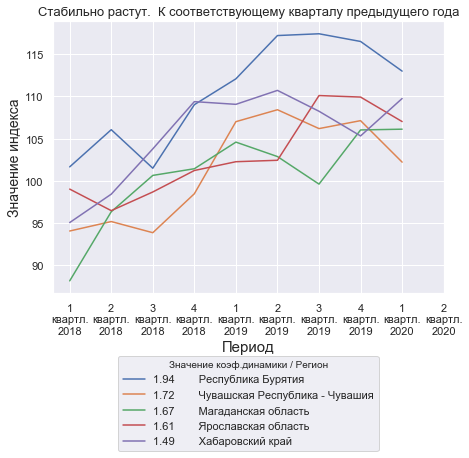

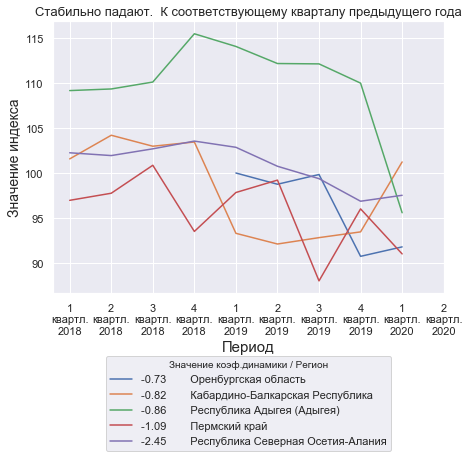

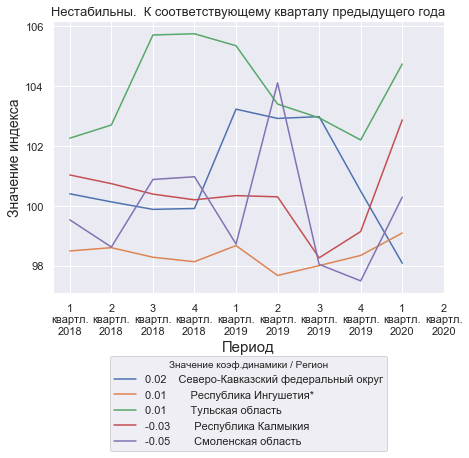

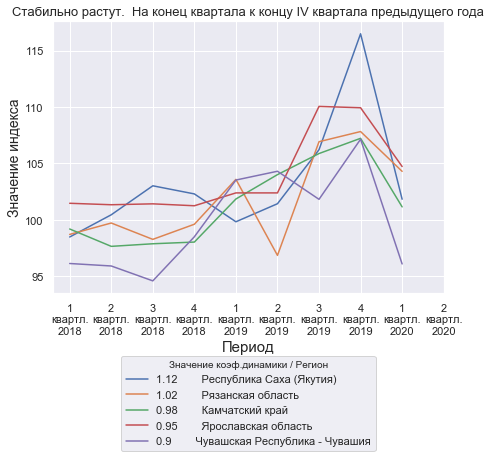

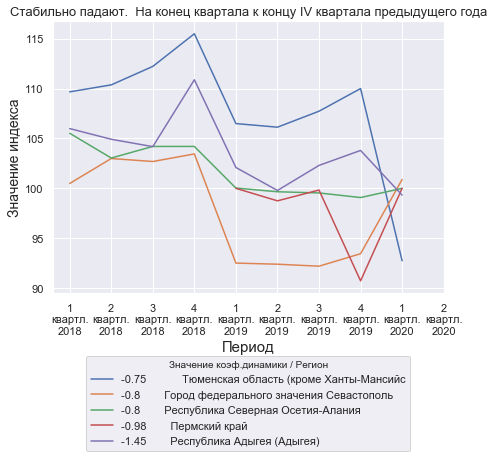

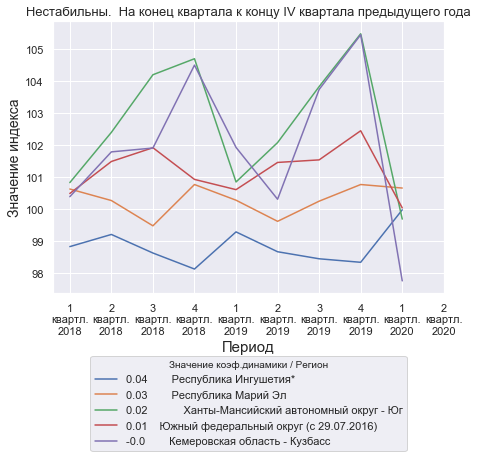

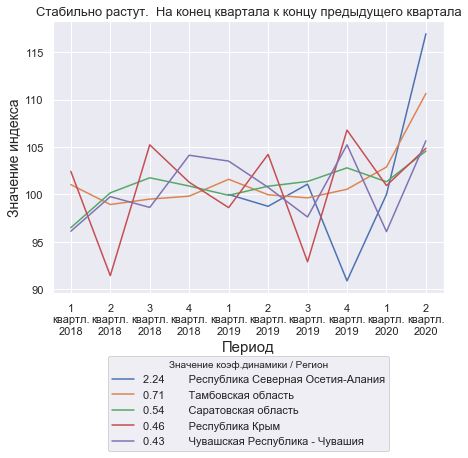

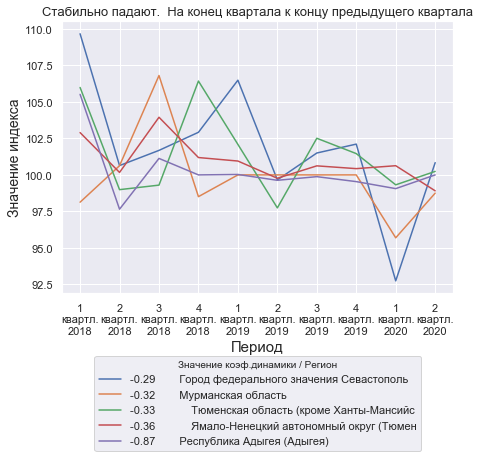

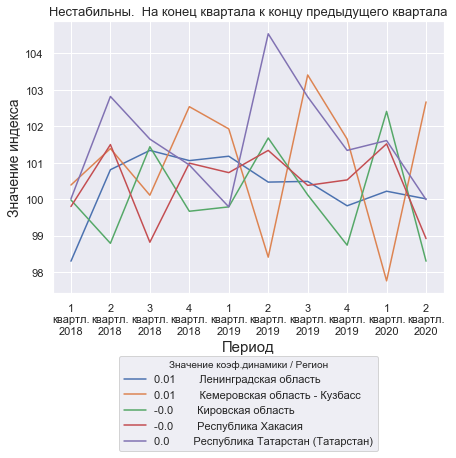

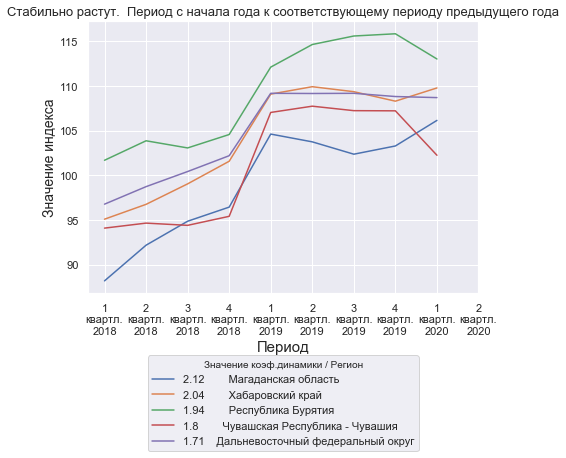

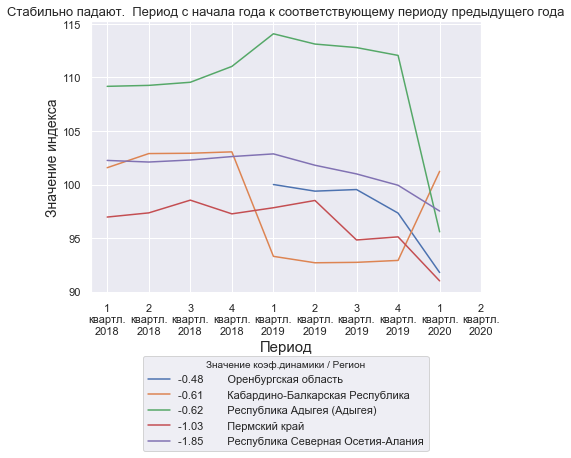

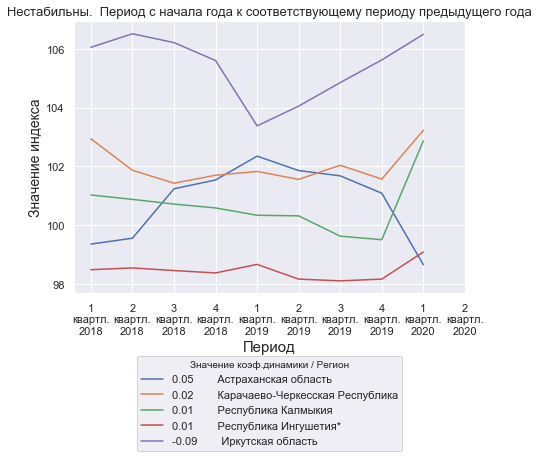

In [1494]:
# Это для заголовка и сохранения
tipe=-1
# Построим графики
types_of_price_index=['К соответствующему кварталу предыдущего года',
                                   'На конец квартала к концу IV квартала предыдущего года',
                                   'На конец квартала к концу предыдущего квартала',
                                   'Период с начала года к соответствующему периоду предыдущего года']
for types in range(len(types_of_price_index)):
    #Соберем топ 5 растущих, убывающих и нестабильных в ДАННОМ ТИПЕ ИНДЕКСА
    top5_rise=df_dinamic_index[df_dinamic_index.Price_index==types_of_price_index[types]].sort_values(by='coef_dinamic_index',ascending=False).head(5)
    top5_crash=df_dinamic_index[df_dinamic_index.Price_index==types_of_price_index[types]].sort_values(by='coef_dinamic_index').head(5)
    
    # Ищем не стабильные. У них постоянные скачки. Коэф будет около 0. А значит это в середине 
    to_find_center_for_nonstable=df_dinamic_index[df_dinamic_index.Price_index==types_of_price_index[types]].sort_values(by='coef_dinamic_index',
                                                                                            ascending=False).reset_index().drop(columns=['index'])
    # Приводим тип для запроса с отрицательным значением
    to_find_center_for_nonstable['coef_dinamic_index'] = to_find_center_for_nonstable['coef_dinamic_index'].astype(float)
    # Берем маленькую выборку где почти ноль
    to_find_center_for_nonstable=to_find_center_for_nonstable.query('coef_dinamic_index>(-0.1) & coef_dinamic_index<0.1')
    # Скидываем индекс фрейма для поиска центре, где почти ноль. Чтобы взять только 5 значений для графика
    to_find_center_for_nonstable=to_find_center_for_nonstable.reset_index().drop(columns=['index'])
    center_non_stable=round(len(to_find_center_for_nonstable)/2)
    top5_nonstable=to_find_center_for_nonstable.loc[center_non_stable-2:center_non_stable+2]
    #Формируем данные для графика
    #Цикл для трех топ пятерок
    for top5_ in [top5_rise,top5_crash,top5_nonstable]:
        all_data=pd.merge(top5_,df_second_market_Flat_type_all, 'left', right_on = ["Price_index","Location"],left_on = ["Price_index","Location"])
        all_data=all_data.sort_values(by='coef_dinamic_index',ascending=False)

        #Делаем для легенды. Значение коэф и название региона     
        for_labels=all_data[['coef_dinamic_index','Location']].values
        labels=[]
        for l in range(len(for_labels)):
            if(len(for_labels[l][1])>50):labels.append(str(for_labels[l][0])+str(for_labels[l][1][0:50])) 
            else: labels.append(str(for_labels[l][0])+str(for_labels[l][1])) 
        all_data=all_data.drop(columns=['coef_dinamic_index','Price_index'])
        
        fig, axes = plt.subplots(figsize = (7,5))

        for i in range(len(all_data)):
                       y_to_plot=all_data.loc[[i]].values[0][1:]
                       plt.plot((range(len(y_to_plot))), y_to_plot)

        axes.set_xlabel('Период',fontsize=15)
        #  Устанавливаем позиции тиков:
        axes.set_xticks(range(len(y_to_plot)))
        #  Устанавливаем подписи тиков
        axes.set_xticklabels(['1\nквартл.\n2018', '2\nквартл.\n2018', '3\nквартл.\n2018', '4\nквартл.\n2018',
                             '1\nквартл.\n2019', '2\nквартл.\n2019', '3\nквартл.\n2019', '4\nквартл.\n2019',
                             '1\nквартл.\n2020', '2\nквартл.\n2020'])
        
        tipe=tipe+1
        tipe_trand=['Стабильно растут.  ',
                    'Стабильно падают.  ',
                    'Нестабильны.  ']
        if (tipe==3):tipe=0
        if (tipe==0):tipe_trand=tipe_trand[0]
        if (tipe==1):tipe_trand=tipe_trand[1]
        if (tipe==2):tipe_trand=tipe_trand[2]
        title=str(tipe_trand)+types_of_price_index[types]
        plt.title(title,fontsize=13)
        axes.set_ylabel('Значение индекса',fontsize=14)
        plt.legend(labels,title ='Значение коэф.динамики / Регион',loc='lower center', bbox_to_anchor=(0.5, -0.60))
        plt.show()
        fig.savefig('img_RW/тренды недвижимости/ГРАФИК_'+title+'.png',bbox_inches='tight')

Цена на товар в базовом периоде 100, в текущем 110. Тогда <br>
Индекс Роста = 110 / 100 = 1,1<br>
Индекс прироста = (110-100) /100 * 100% = 10%<br>
Оба показателя отражают один и тот же процесс. Первый индекс (отражающий рост) говорит, что цена товара выросла в 1,1 раза
а второй (отражающий прирост), что цена товара выроста на 10%. Что по сути - одно и то же, но с разных точек зрения. <br>

In [1523]:
# Лидер. быстрее всего меняется индекс 
print('Период с начала года к соответствующему периоду предыдущего года')
print('Лидер - Магаданская область')
lider_second_maarket=df_second_market_Flat_type_all.query('Location=="        Магаданская область" & Price_index=="Период с начала года к соответствующему периоду предыдущего года"')
print('Измнился индекс с 2018_1_quarter на момент 2020_1_quarter на',
      round(lider_second_maarket['2020_1_quarter'].values[0]-lider_second_maarket['2018_1_quarter'].values[0],2))


tekusch=lider_second_maarket['2020_1_quarter'].values[0]
bazov=lider_second_maarket['2018_1_quarter'].values[0]
print('\nИндекс Роста: ',
     round((tekusch/bazov),2),
     '\nИндекс прироста: ',
     round((tekusch-bazov)/bazov*100,2),'%')


Период с начала года к соответствующему периоду предыдущего года
Лидер - Магаданская область
Измнился индекс с 2018_1_quarter на момент 2020_1_quarter на 17.95

Индекс Роста:  1.2 
Индекс прироста:  20.36 %


# 2) В каком классе (тип квартир) и на какой % сильнее всего изменилась стоимость на вторичном рынке? [ПО РОССИИ]

Т.к в пункте 1 определили что индекс " Период с начала года к соответствующему периоду предыдущего года релевантый", то смотрим срау по нему

In [1524]:
# Убираем строки "Все типы квартир"
df_second_market_Flat_type_without_all=df_second_market.drop(df_second_market.query('Flat_type=="Все типы квартир"').index)
# Оставляем нужный индекс цены
df_second_market_Flat_type_without_all=df_second_market_Flat_type_without_all.query('Price_index=="Период с начала года к соответствующему периоду предыдущего года"').drop(columns='Price_index')
df_second_market_Flat_type_without_all                                       

,Location,Flat_type,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
2365,Российская Федерация,Квартиры среднего качества (типовые),100.53,100.76,101.5,102.19,104.75,104.86,104.8,104.67,102.26,NaN
2366,Российская Федерация,Низкого качества,99.22,100.02,101.04,102.11,105.03,104.57,104.31,103.82,103.33,NaN
2367,Российская Федерация,Улучшенного качества,98.35,99.22,99.8,100.81,104.84,104.53,105.16,104.88,103.28,NaN
2368,Российская Федерация,Элитные квартиры,101.73,101.73,102.08,102.11,98.53,97.95,98.47,99,101.7,NaN
2370,Центральный федеральный округ,Квартиры среднего качества (типовые),98.47,99.08,100.55,101,105.25,105.37,105.44,104.89,97.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2802,Сахалинская область,Улучшенного качества,107.45,107.08,105.13,103.05,100.51,100.51,101.34,101.92,112.89,NaN
2803,Сахалинская область,Элитные квартиры,94.13,103.51,106.89,110.48,117.56,109.63,105.29,104,106.93,NaN
2805,Еврейская автономная область,Квартиры среднего качества (типовые),98.88,101.15,101.68,102.24,102.25,100.1,100.26,99.77,96.51,NaN
2806,Еврейская автономная область,Низкого качества,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.99,NaN


In [1525]:
# Проверим целлостность данных
print('Типы квартир: ',df_second_market_Flat_type_without_all.Flat_type.unique(),
      '\nКол-во типов квартир: ',df_second_market_Flat_type_without_all.Flat_type.nunique(),'\n',
      '\nТипы регионов: ',df_second_market_Flat_type_without_all.Location.unique()[0:10], 'и т.д.',
      '\nКол-во типов регионов: ',df_second_market_Flat_type_without_all.Location.nunique(),'\n',
      '\nОжидалось строк:',4*95,
     '\nСтрок в фрейме',df_second_market_Flat_type_without_all.index.nunique())

Типы квартир:  ['Квартиры среднего качества (типовые)' 'Низкого качества'
 'Улучшенного качества' 'Элитные квартиры'] 
Кол-во типов квартир:  4 
 
Типы регионов:  ['Российская Федерация' '    Центральный федеральный округ'
 '        Белгородская область' '        Брянская область'
 '        Владимирская область' '        Воронежская область'
 '        Ивановская область' '        Калужская область'
 '        Костромская область' '        Курская область'] и т.д. 
Кол-во типов регионов:  95 
 
Ожидалось строк: 380 
Строк в фрейме 347


In [1526]:
# Ищем проблемные регионы
loc=df_second_market_Flat_type_without_all.Location.unique()
problems_name=[]
problems_lenght=[]
for l in loc:
      if len(df_second_market_Flat_type_without_all[df_second_market_Flat_type_without_all['Location']==str(l)][['Location']])!=4:
        index=df_second_market_Flat_type_without_all[df_second_market_Flat_type_without_all['Location']==str(l)].index
        name=df_second_market_Flat_type_without_all[df_second_market_Flat_type_without_all['Location']==str(l)].loc[index[0],'Location']
        lenght=len(df_second_market_Flat_type_without_all[df_second_market_Flat_type_without_all['Location']==str(l)])
        problems_name.append(name)
        problems_lenght.append(lenght)
problems_name=pd.DataFrame(problems_name, columns=['Location'])
problems_lenght=pd.DataFrame(problems_lenght, columns=['count'])
problems=pd.concat([problems_name, problems_lenght], axis=1)
problems

,Location,count
0,Белгородская область,3
1,Владимирская область,2
2,Курская область,3
3,Орловская область,3
4,Смоленская область,2
5,Тверская область,3
6,Город Москва столица Российской Федера...,3
7,Ненецкий автономный округ (Арханге...,1
8,Мурманская область,2
9,Республика Калмыкия,2


Много проблемных регионов. Меньше 4. Значит отсутствует инфо каком-то типе квартир <br>
А вот больше 4 - ДУБЛИРОВАНИЕ ИНФОРМАЦИИ

In [1527]:
problems.query('count >4')

,Location,count
21,Сибирский федеральный округ,8
25,Дальневосточный федеральный округ,8


In [1528]:
 # Собираем все строки в одни с верными значениям
def fix(df_to_fix):
    first=df_to_fix.loc[df_to_fix.index[0]]
    second=df_to_fix.loc[df_to_fix.index[1]]
    #Запоминаем где nan
    to_insted=[]
    for i in range(2,len(list(first))):
        if (np.isnan(list(first)[i])):
            to_insted.append(i)
    new_first=df_to_fix.loc[df_to_fix.index[0]]
    new_first=new_first.values
    #Заменяем nan нормальными значениями
    for i in to_insted:
        new_first[i]=list(second)[i]
    return (new_first[2:])


#ВХОД
# Определяем проблемные локоции которые фиксим
more_4=problems.query('count >4')["Location"].values
for Location_Name in more_4:
    fixed=df_second_market_Flat_type_without_all[df_second_market_Flat_type_without_all['Location']==Location_Name].groupby('Flat_type').apply(func=fix)

    df_buf=pd.DataFrame(fixed,columns=['value'])
    df_buf=df_buf.reset_index()
    df_buf[['2018_1_quarter', '2018_2_quarter', '2018_3_quarter', '2018_4_quarter',
                             '2019_1_quarter', '2019_2_quarter', '2019_3_quarter', '2019_4_quarter',
                             '2020_1_quarter', '2020_2_quarter']] = pd.DataFrame(df_buf.value.values.tolist(), index= df_buf.index)
    df_buf=df_buf.drop(columns=['value'])

    # Процедура замены
    repeats=df_second_market_Flat_type_without_all[df_second_market_Flat_type_without_all['Location']==Location_Name]
    repeats_ind=repeats.index
    # Удаляем дублирующиеся строки 
    df_second_market_Flat_type_without_all=df_second_market_Flat_type_without_all.drop(index=repeats_ind[1::2])
    # Чиним (дозаполняем) оставшиеся строки
    k=0
    for i in repeats_ind[::2]:
        df_second_market_Flat_type_without_all.loc[i, '2018_1_quarter':'2020_2_quarter']=df_buf.loc[k, '2018_1_quarter':'2020_2_quarter']
        k=k+1 # это индекс в буферном датафрейме с верными значениями

In [1529]:
# Проверяем результат 1
df_second_market_Flat_type_without_all[df_second_market_Flat_type_without_all['Location']==more_4[0]]

,Location,Flat_type,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
2702,Сибирский федеральный округ,Квартиры среднего качества (типовые),101.58,102.64,102.97,103.58,105.8,105.44,105.6,105.42,104.41,NaN
2704,Сибирский федеральный округ,Улучшенного качества,100.66,101.21,102.85,104.83,109.07,109.1,107.91,106.48,104.34,NaN
2707,Сибирский федеральный округ,Квартиры среднего качества (типовые),102.49,103.01,102.71,103.25,105.03,104.9,105.44,105.56,106.23,NaN
2709,Сибирский федеральный округ,Улучшенного качества,98.94,97.57,98.06,98.49,104.14,104.49,104.67,104.87,103.66,NaN


In [1530]:
# Проверяем результат 2
df_second_market_Flat_type_without_all[df_second_market_Flat_type_without_all['Location']==more_4[1]]

,Location,Flat_type,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
2758,Дальневосточный федеральный округ,Квартиры среднего качества (типовые),100.93,101.29,102.72,103.38,108.6,109.91,110.07,110.32,109.45,NaN
2760,Дальневосточный федеральный округ,Улучшенного качества,98.42,100.14,100.56,102,109.98,108.43,109.65,107.94,108.93,NaN
2763,Дальневосточный федеральный округ,Квартиры среднего качества (типовые),92.41,95.51,97.51,100.38,109.51,108.89,108.8,108.05,108.03,NaN
2765,Дальневосточный федеральный округ,Улучшенного качества,96.59,103.42,106.31,108.57,109.85,104.37,101.69,101.83,106.2,NaN


Ищем коэфициент ДИНАМИКИ изменения через регрессию

In [1502]:
# Динамика через регрессию
def linregress(x, y, w=None, b=None):
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    if w is None:
        w = np.ones(x.size, dtype=np.float64)
    wxy = np.sum(w*y*x)
    wx = np.sum(w*x)
    wy = np.sum(w*y)
    wx2 = np.sum(w*x*x)
    sw = np.sum(w)
    den = wx2*sw - wx*wx
    if den == 0:
        den = np.finfo(np.float64).eps
    if b is None:
        k = (sw*wxy - wx*wy) / den
        b = (wy - k*wx) / sw
    else:
        k = (wxy - wx*b) / wx2
    return k, b

# Считаем динамику индексов
def f(df_f):
    #Множество типов индексов
    types_of_flat=df_f.Flat_type.unique()
    #Готовим фрейм который отдадим из функции
    df_return= pd.DataFrame(index=types_of_flat,
                           columns=['coef_dinamic_index'])
    #Ищем коэфициент динамики изменения для кажого типа индекса
    for t in types_of_flat:
        price_index=df_f[df_f.Flat_type==t].values
        
        #Берем значения индексов откидывая название области и типа квартиры
        index_meaning=price_index[0][2:]
        #Убираем nan если есть
        to_del=[]
        for i in range(len(index_meaning)):
            if (np.isnan(index_meaning[i])):
                to_del.append(i)
        index_meaning = np.delete(index_meaning, to_del)  
        
        #   Ищем если досаточно инф     
        if (len(index_meaning)>3):   
            #   Ищем коэф регресии
            lin_reg=linregress(range(len(index_meaning)),index_meaning)
            #   Запись ответа. Пишем коэф K (kx+b)
            df_return.loc[t,'coef_dinamic_index']=round(lin_reg[0],2)
    return df_return
        
df_dinamic_index=df_second_market_Flat_type_without_all.groupby('Location').apply(func=f)
df_dinamic_index
# # Уйдем от мульти индлекса
df_dinamic_index=df_dinamic_index.reset_index()
df_dinamic_index=df_dinamic_index.rename(columns={'level_1':'Flat_type'})
df_dinamic_index=df_dinamic_index.dropna(axis=0)

!!!!!!!!!!!!
                                               Location  \
2478              Архангельская область (кроме Ненец...   
2479              Архангельская область (кроме Ненец...   
2480              Архангельская область (кроме Ненец...   
2481              Архангельская область (кроме Ненец...   

                                 Flat_type 2018_1_quarter 2018_2_quarter  \
2478  Квартиры среднего качества (типовые)         100.19         100.54   
2479                      Низкого качества          96.25          96.63   
2480                  Улучшенного качества          98.65          99.73   
2481                      Элитные квартиры         103.21         102.38   

     2018_3_quarter 2018_4_quarter 2019_1_quarter 2019_2_quarter  \
2478         100.15         100.48         104.34         103.61   
2479          97.52          97.57           99.8          99.93   
2480          100.2         101.12         105.84         104.45   
2481         100.75          99.31    

2377          98.87            NaN  
Квартиры среднего качества (типовые)
9
[98.58 98.5 99.39 100.7 103.07 104.51 104.4 103.32 98.38]
Улучшенного качества
9
[102.69 102.08 99.91 99.02 103.58 104.06 104.12 103.37 98.74]
Элитные квартиры
5
[101.84 102.27 102.01 101.5 98.87]
!!!!!!!!!!!!
                      Location                             Flat_type  \
2379          Брянская область  Квартиры среднего качества (типовые)   
2380          Брянская область                      Низкого качества   
2381          Брянская область                  Улучшенного качества   
2382          Брянская область                      Элитные квартиры   

     2018_1_quarter 2018_2_quarter 2018_3_quarter 2018_4_quarter  \
2379          95.31          97.51          98.29          98.51   
2380          92.29          93.52          94.95          96.03   
2381          90.34          91.87          92.53          93.06   
2382          98.63          99.31          99.18          99.07   

     2019_1_

Квартиры среднего качества (типовые)
9
[98.88 101.15 101.68 102.24 102.25 100.1 100.26 99.77 96.51]
Низкого качества
1
[96.99]
Улучшенного качества
9
[101.71 102.95 101.29 100.97 104.23 101.03 99.65 99.13 101.8]
!!!!!!!!!!!!
                        Location                             Flat_type  \
2772          Забайкальский край  Квартиры среднего качества (типовые)   
2773          Забайкальский край                  Улучшенного качества   
2774          Забайкальский край                      Элитные квартиры   

     2018_1_quarter 2018_2_quarter 2018_3_quarter 2018_4_quarter  \
2772          98.55          97.75          98.07           98.5   
2773          101.5         101.32         101.08         101.18   
2774         101.99         101.99         101.99         101.49   

     2019_1_quarter 2019_2_quarter 2019_3_quarter 2019_4_quarter  \
2772         102.88         103.11         103.19         103.52   
2773          102.2         101.91         102.61         103.09   
2

Квартиры среднего качества (типовые)
9
[100.64 102.64 103.02 103.83 108.6 107.32 106.55 105.78 100.91]
Низкого качества
9
[102.65 101.08 98.03 97.24 109.5 110.95 110.33 108.22 85.67]
Улучшенного качества
9
[101.41 101.18 101.08 101.61 104.07 102.16 103.95 104.78 103.11]
Элитные квартиры
1
[109.39]
!!!!!!!!!!!!
                       Location                             Flat_type  \
2631          Кировская область  Квартиры среднего качества (типовые)   
2632          Кировская область                      Низкого качества   
2633          Кировская область                  Улучшенного качества   
2634          Кировская область                      Элитные квартиры   

     2018_1_quarter 2018_2_quarter 2018_3_quarter 2018_4_quarter  \
2631          98.95         100.01         100.77         100.47   
2632          98.27          98.85          98.85          98.68   
2633          93.13          94.65           96.8          97.72   
2634         101.25         100.03         100.63 

Улучшенного качества
9
[99.87 100.48 101.53 102.47 105.27 105.68 106.2 105.88 105.05]
Элитные квартиры
9
[101.29 101.16 100.77 100.64 101.53 101.5 102.18 101.62 100]
!!!!!!!!!!!!
                        Location                             Flat_type  \
2498          Мурманская область  Квартиры среднего качества (типовые)   
2499          Мурманская область                  Улучшенного качества   

     2018_1_quarter 2018_2_quarter 2018_3_quarter 2018_4_quarter  \
2498          99.32          99.72         101.38         103.01   
2499           97.9          99.34          101.6         103.47   

     2019_1_quarter 2019_2_quarter 2019_3_quarter 2019_4_quarter  \
2498         106.62         106.63         105.09         104.09   
2499         103.64         104.08         104.03         103.68   

     2020_1_quarter 2020_2_quarter  
2498         102.26            NaN  
2499         100.55            NaN  
Квартиры среднего качества (типовые)
9
[99.32 99.72 101.38 103.01 106.62 106.

Элитные квартиры
9
[101.31 102.52 102.05 101.56 82.86 82.79 82.88 83.19 98.93]
!!!!!!!!!!!!
                     Location                             Flat_type  \
2783          Приморский край  Квартиры среднего качества (типовые)   
2784          Приморский край                      Низкого качества   
2785          Приморский край                  Улучшенного качества   
2786          Приморский край                      Элитные квартиры   

     2018_1_quarter 2018_2_quarter 2018_3_quarter 2018_4_quarter  \
2783          99.75          101.4         102.84         103.87   
2784          97.12          99.05          99.41         101.32   
2785         100.02         101.11         101.49         102.83   
2786            NaN            NaN            NaN            NaN   

     2019_1_quarter 2019_2_quarter 2019_3_quarter 2019_4_quarter  \
2783         110.29         109.19         109.79         110.24   
2784         110.67         110.96         113.76         111.82   
2785   

Улучшенного качества
9
[97.58 97.58 97.78 99.61 105.42 107.39 107.55 106.31 100.73]
Элитные квартиры
5
[110.02 110.65 109.82 105.82 98.71]
!!!!!!!!!!!!
                     Location                             Flat_type  \
2529          Республика Крым  Квартиры среднего качества (типовые)   
2530          Республика Крым                      Низкого качества   
2531          Республика Крым                  Улучшенного качества   
2532          Республика Крым                      Элитные квартиры   

     2018_1_quarter 2018_2_quarter 2018_3_quarter 2018_4_quarter  \
2529          99.63          95.05          96.16          97.11   
2530          97.32          96.71          99.96          99.21   
2531          99.37          98.78          94.19           95.1   
2532            NaN            NaN            NaN            NaN   

     2019_1_quarter 2019_2_quarter 2019_3_quarter 2019_4_quarter  \
2529          98.32            101           98.2          99.47   
2530         10

Низкого качества
9
[106.64 105.6 107.1 106.58 111.06 108.89 108.75 109.42 111.29]
Улучшенного качества
9
[107.45 107.08 105.13 103.05 100.51 100.51 101.34 101.92 112.89]
Элитные квартиры
9
[94.13 103.51 106.89 110.48 117.56 109.63 105.29 104 106.93]
!!!!!!!!!!!!
                          Location                             Flat_type  \
2675          Свердловская область  Квартиры среднего качества (типовые)   
2676          Свердловская область                      Низкого качества   
2677          Свердловская область                  Улучшенного качества   
2678          Свердловская область                      Элитные квартиры   

     2018_1_quarter 2018_2_quarter 2018_3_quarter 2018_4_quarter  \
2675         100.74          101.4         102.25         102.45   
2676         102.17          101.1          101.9         101.36   
2677          98.42          99.51         100.56         101.36   
2678         111.99         107.41         106.04         104.12   

     2019_1_qua

Улучшенного качества
9
[99.85 99.82 99.86 99.87 101.61 101.43 101.28 101.1 100.77]
Элитные квартиры
5
[100 100 100 100 102.78]
!!!!!!!!!!!!
                                    Location  \
2621          Чувашская Республика - Чувашия   
2622          Чувашская Республика - Чувашия   
2623          Чувашская Республика - Чувашия   
2624          Чувашская Республика - Чувашия   

                                 Flat_type 2018_1_quarter 2018_2_quarter  \
2621  Квартиры среднего качества (типовые)          95.15          95.28   
2622                      Низкого качества          83.39          83.52   
2623                  Улучшенного качества          93.66          94.55   
2624                      Элитные квартиры            NaN            NaN   

     2018_3_quarter 2018_4_quarter 2019_1_quarter 2019_2_quarter  \
2621          95.55          96.09         102.88         102.88   
2622          84.55          86.55            NaN            NaN   
2623          93.85          95.19

Строим графики лидеров по динамике изменения 

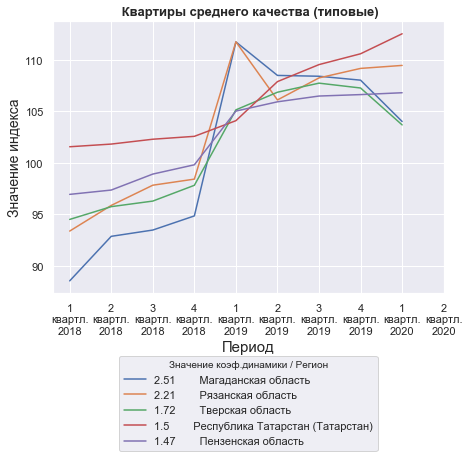

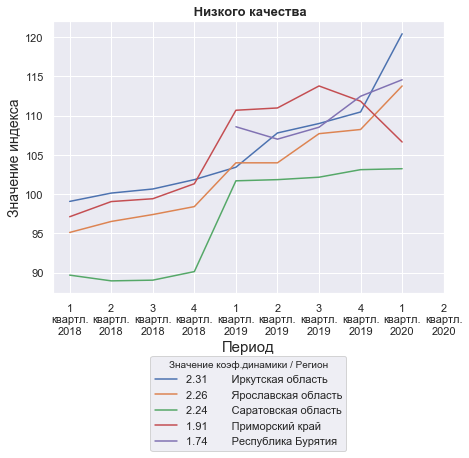

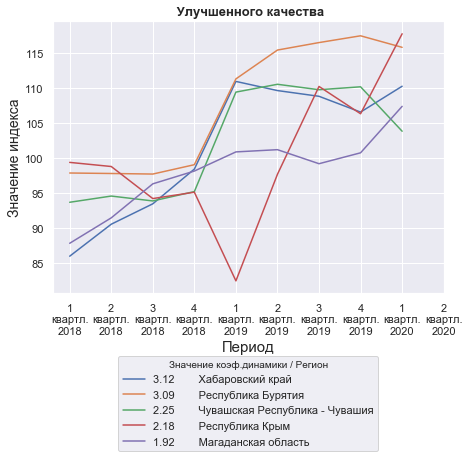

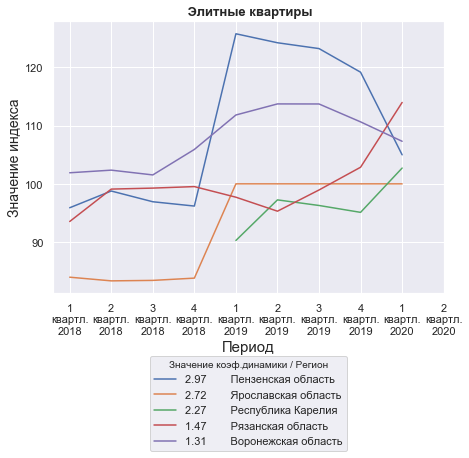

In [1511]:
# Это для заголовка и сохранения
tipe=-1
# Построим графики
types_of_Flat_type=['Квартиры среднего качества (типовые)', 'Низкого качества',
                     'Улучшенного качества', 'Элитные квартиры'] 
for types in range(len(types_of_Flat_type)):
    #Соберем топ 5 растущих, убывающих и нестабильных в ДАННОМ ТИПЕ ИНДЕКСА
    top5_rise=df_dinamic_index[df_dinamic_index.Flat_type==types_of_Flat_type[types]].sort_values(by='coef_dinamic_index',ascending=False).head(5)
    top5_crash=df_dinamic_index[df_dinamic_index.Flat_type==types_of_Flat_type[types]].sort_values(by='coef_dinamic_index').head(5)
    
    # Ищем не стабильные. У них постоянные скачки. Коэф будет около 0. А значит это в середине 
    to_find_center_for_nonstable=df_dinamic_index[df_dinamic_index.Flat_type==types_of_Flat_type[types]].sort_values(by='coef_dinamic_index',
                                                                                            ascending=False).reset_index().drop(columns=['index'])
    # Приводим тип для запроса с отрицательным значением
    to_find_center_for_nonstable['coef_dinamic_index'] = to_find_center_for_nonstable['coef_dinamic_index'].astype(float)
    # Берем маленькую выборку где почти ноль
    to_find_center_for_nonstable=to_find_center_for_nonstable.query('coef_dinamic_index>(-0.2) & coef_dinamic_index<0.2')
    # Скидываем индекс фрейма для поиска центре, где почти ноль. Чтобы взять только 5 значений для графика
    to_find_center_for_nonstable=to_find_center_for_nonstable.reset_index().drop(columns=['index'])
    center_non_stable=round(len(to_find_center_for_nonstable)/2)
    top5_nonstable=to_find_center_for_nonstable.loc[center_non_stable-2:center_non_stable+2]
    
    #Формируем данные для графика
    #Цикл для трех топ пятерок
    for top5_ in [top5_rise]:
        all_data=pd.merge(top5_,df_second_market_Flat_type_without_all, 'left', right_on = ["Flat_type","Location"],left_on = ["Flat_type","Location"])
        all_data=all_data.sort_values(by='coef_dinamic_index',ascending=False)

        #Делаем для легенды. Значение коэф и название региона     
        for_labels=all_data[['coef_dinamic_index','Location']].values
        labels=[]
        for l in range(len(for_labels)):
            if(len(for_labels[l][1])>50):labels.append(str(for_labels[l][0])+str(for_labels[l][1][0:50])) 
            else: labels.append(str(for_labels[l][0])+str(for_labels[l][1])) 

        all_data=all_data.drop(columns=['coef_dinamic_index','Flat_type'])

        fig, axes = plt.subplots(figsize = (7,5))
        for i in range(len(all_data)):
                       y_to_plot=all_data.loc[[i]].values[0][1:]
                       plt.plot((range(len(y_to_plot))), y_to_plot)

        axes.set_xlabel('Период',fontsize=15)
        #  Устанавливаем позиции тиков:
        axes.set_xticks(range(len(y_to_plot)))
        #  Устанавливаем подписи тиков
        axes.set_xticklabels(['1\nквартл.\n2018', '2\nквартл.\n2018', '3\nквартл.\n2018', '4\nквартл.\n2018',
                             '1\nквартл.\n2019', '2\nквартл.\n2019', '3\nквартл.\n2019', '4\nквартл.\n2019',
                             '1\nквартл.\n2020', '2\nквартл.\n2020'])
        
#         tipe=tipe+1
#         tipe_trand=['Стабильно растут.  ',
#                     'Стабильно падают.  ',
#                     'Нестабильны.  ']
#         if (tipe==3):tipe=0
#         if (tipe==0):tipe_trand=tipe_trand[0]
#         if (tipe==1):tipe_trand=tipe_trand[1]
#         if (tipe==2):tipe_trand=tipe_trand[2]
        tipe_trand=''
        title=str(tipe_trand)+str(' ')+types_of_Flat_type[types]
        plt.title(title,fontsize=13,weight="semibold")
        
        axes.set_ylabel('Значение индекса',fontsize=14)
        plt.legend(labels,title ='Значение коэф.динамики / Регион',loc='lower center', bbox_to_anchor=(0.5, -0.60))
        plt.show()
        fig.savefig('img_RW/тренды недвижимости/2_вопрос_лидеры_по_динамике(регрессия)/ГРАФИК_'+title+'.png',bbox_inches='tight')

НО для ответа на вопрос нужено считать ИНДЕКС ПРИРОСТА

In [1685]:
# Считаем индекс прироста на вторичке для каждого типа квартиры в каждом регионе
def prirost_ind(df_f): 
    #Множество типов индексов
    types_of_flat=df_f.Flat_type.unique()
    #Готовим фрейм который отдадим из функции
    df_return= pd.DataFrame(index=types_of_flat,
                           columns=['prirost_ind'])
    #Ищем коэфициент прироста для кажого типа квартиры
    for t in types_of_flat:
        price_index=df_f[df_f.Flat_type==t].values
        
        #Берем значения индексов откидывая название области и типа квартиры
        index_meaning=price_index[0][2:]
        #Убираем nan если есть
        to_del=[]
        for i in range(len(index_meaning)):
            if (np.isnan(index_meaning[i])):
                to_del.append(i)
        index_meaning = np.delete(index_meaning, to_del)  
        
        # Параметры для рассчета коэф прироста
        bazov=index_meaning[0]
        tekusch=index_meaning[len(index_meaning)-1]
        df_return.loc[t,'prirost_ind']=round((tekusch-bazov)/bazov*100,2)

    return df_return
        
df_Priros_ind_second_marcet_Flat_type_without_all=df_second_market_Flat_type_without_all.groupby('Location').apply(func=prirost_ind)
# # Уйдем от мульти индлекса
df_Priros_ind_second_marcet_Flat_type_without_all=df_Priros_ind_second_marcet_Flat_type_without_all.reset_index()
df_Priros_ind_second_marcet_Flat_type_without_all=df_Priros_ind_second_marcet_Flat_type_without_all.rename(columns={'level_1':'Flat_type'})
df_Priros_ind_second_marcet_Flat_type_without_all

,Location,Flat_type,prirost_ind
0,Архангельская область (кроме Ненец...,Квартиры среднего качества (типовые),0.91
1,Архангельская область (кроме Ненец...,Низкого качества,10.83
2,Архангельская область (кроме Ненец...,Улучшенного качества,3.93
3,Архангельская область (кроме Ненец...,Элитные квартиры,-2.67
4,Ненецкий автономный округ (Арханге...,Квартиры среднего качества (типовые),0.63
...,...,...,...
330,Южный федеральный округ (с 29.07.2016),Элитные квартиры,3.67
331,Российская Федерация,Квартиры среднего качества (типовые),1.72
332,Российская Федерация,Низкого качества,4.14
333,Российская Федерация,Улучшенного качества,5.01


Ответ готов! См. табл ниже

In [1683]:
# Определяем медиану индекса прироста для каждого типа квартиры
df_Priros_ind_second_marcet_Flat_type_without_all['prirost_ind'] = df_Priros_ind_second_marcet_Flat_type_without_all['prirost_ind'].astype(float)
df_Priros_ind_second_marcet_Flat_type_without_all.groupby('Flat_type',as_index=False).agg({'prirost_ind' : 'median'})

,Flat_type,prirost_ind
0,Квартиры среднего качества (типовые),2.3925
1,Низкого качества,3.7894
2,Улучшенного качества,4.0776
3,Элитные квартиры,0.0000


График для иллюстрации.<br>
Определили регионы-лидеры по индексу прироста.
<br> Нарисовали динамику изменения индекса цены

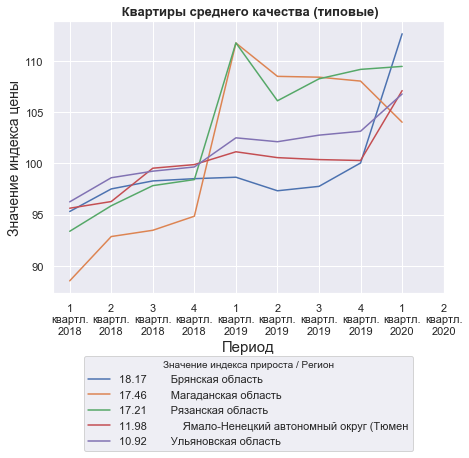

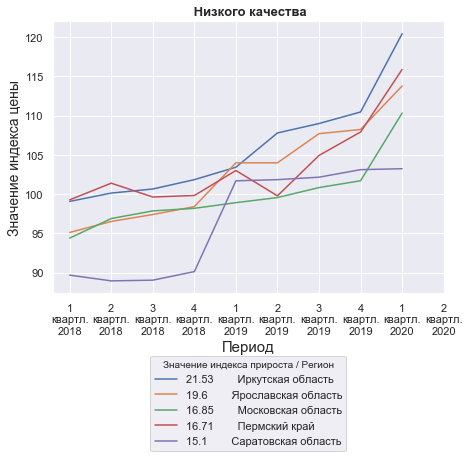

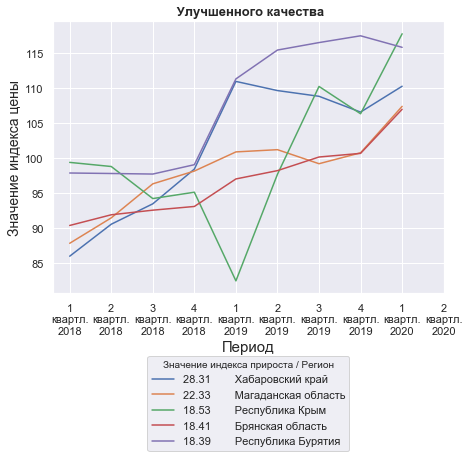

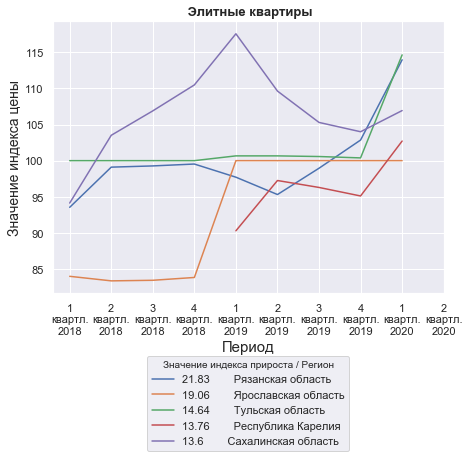

In [1646]:
# Это для заголовка и сохранения
tipe=-1
# Построим графики
types_of_Flat_type=['Квартиры среднего качества (типовые)', 'Низкого качества',
                     'Улучшенного качества', 'Элитные квартиры'] 
for types in range(len(types_of_Flat_type)):
#   Соберем топ 5 растущих, убывающих и нестабильных в ДАННОМ ТИПЕ ИНДЕКСА
    top5_rise=df_Priros_ind_second_marcet_Flat_type_without_all[df_Priros_ind_second_marcet_Flat_type_without_all.Flat_type==types_of_Flat_type[types]].sort_values(by='prirost_ind',ascending=False).head(5)

    
    #Формируем данные для графика
    #Цикл для трех топ пятерок
    for top5_ in [top5_rise]:
        all_data=pd.merge(top5_,df_second_market_Flat_type_without_all, 'left', right_on = ["Flat_type","Location"],left_on = ["Flat_type","Location"])
        all_data=all_data.sort_values(by='prirost_ind',ascending=False)

        #Делаем для легенды. Значение коэф и название региона     
        for_labels=all_data[['prirost_ind','Location']].values
        labels=[]
        for l in range(len(for_labels)):
            if(len(for_labels[l][1])>50):labels.append(str(for_labels[l][0])+str(for_labels[l][1][0:50])) 
            else: labels.append(str(for_labels[l][0])+str(for_labels[l][1])) 

        all_data=all_data.drop(columns=['prirost_ind','Flat_type'])

        fig, axes = plt.subplots(figsize = (7,5))

        for i in range(len(all_data)):
                       y_to_plot=all_data.loc[[i]].values[0][1:]
                       plt.plot((range(len(y_to_plot))), y_to_plot)

        axes.set_xlabel('Период',fontsize=15)
        #  Устанавливаем позиции тиков:
        axes.set_xticks(range(len(y_to_plot)))
        #  Устанавливаем подписи тиков
        axes.set_xticklabels(['1\nквартл.\n2018', '2\nквартл.\n2018', '3\nквартл.\n2018', '4\nквартл.\n2018',
                             '1\nквартл.\n2019', '2\nквартл.\n2019', '3\nквартл.\n2019', '4\nквартл.\n2019',
                             '1\nквартл.\n2020', '2\nквартл.\n2020'])
        
#         tipe=tipe+1
#         tipe_trand=['Стабильно растут.  ',
#                     'Стабильно падают.  ',
#                     'Нестабильны.  ']
#         if (tipe==3):tipe=0
#         if (tipe==0):tipe_trand=tipe_trand[0]
#         if (tipe==1):tipe_trand=tipe_trand[1]
#         if (tipe==2):tipe_trand=tipe_trand[2]
        tipe_trand=''
        title=str(tipe_trand)+str(' ')+types_of_Flat_type[types]
        plt.title(title,fontsize=13,weight="semibold")
        
        axes.set_ylabel('Значение индекса цены',fontsize=14)
        plt.legend(labels,title ='Значение индекса прироста / Регион',loc='lower center', bbox_to_anchor=(0.5, -0.60))
        plt.show()
        fig.savefig('img_RW/тренды недвижимости/2_вопрос_лидеры_по_идексу_прироста_вторичка/ГРАФИК_'+title+'.png',bbox_inches='tight')

# 3) В каком регионе быстрее всего меняется динамика индекса цен на новостройки?

In [1573]:
df_first_market= pd.read_excel('data_price_dynamics.xls')
df_first_market=df_first_market.drop(index=[0,1,2])

df_first_market=df_first_market.rename(columns={'Индексы цен на рынке жилья (процент)': 'Price_index',
                                                  'Unnamed: 1':'Market_type',
                                                  'Unnamed: 2':'Location',
                                                  'Unnamed: 3':'Flat_type',
                                                   'Unnamed: 4':'2018_1_quarter',
                                                    'Unnamed: 5':'2018_2_quarter',
                                                    'Unnamed: 6':'2018_3_quarter',
                                                    'Unnamed: 7':'2018_4_quarter',
                                                    'Unnamed: 8':'2019_1_quarter',
                                                    'Unnamed: 9':'2019_2_quarter',
                                                    'Unnamed: 10':'2019_3_quarter',
                                                    'Unnamed: 11':'2019_4_quarter',
                                                    'Unnamed: 12':'2020_1_quarter',
                                                    'Unnamed: 13':'2020_2_quarter'})
# Датафрейм по вторичному рынку
df_first_market=df_first_market[df_first_market['Market_type']=='Первичный рынок жилья'].drop(columns='Market_type')
# Оставим тип "Все типы квартир	"
df_first_market_Flat_type_all=df_first_market[df_first_market['Flat_type']=='Все типы квартир'].drop(columns='Flat_type')

Проверка полноты данных

In [1610]:
print('Кол-во субъектов в фрейме',
     df_first_market_Flat_type_all.Location.nunique())
print('Кол-во индексов цен в фрейме',
     df_first_market_Flat_type_all.Price_index.nunique())
print('Кол-во строк в фрейме',
     df_first_market_Flat_type_all.index.nunique())

Кол-во субъектов в фрейме 94
Кол-во индексов цен в фрейме 4
Кол-во строк в фрейме 384


In [1589]:
# Про какой регион нет информации на первичном рынке???
for i in df_second_market_Flat_type_all.Location.unique():
    f=0
    for j in df_first_market_Flat_type_all.Location.unique():
        if (i==j): 
            f=1
    if f==0: print(i)

        Мурманская область


Полная информация 4*94=376 строк
В фрейме 384, присутствует избыточная инф

In [1612]:
# Ищем проблемные регионы
loc=df_first_market_Flat_type_all.Location.unique()
problems_name=[]
problems_lenght=[]
for l in loc:
      if len(df_first_market_Flat_type_all[df_first_market_Flat_type_all['Location']==str(l)][['Location']])!=4:
        index=df_first_market_Flat_type_all[df_first_market_Flat_type_all['Location']==str(l)].index
        name=df_first_market_Flat_type_all[df_first_market_Flat_type_all['Location']==str(l)].loc[index[0],'Location']
        lenght=len(df_first_market_Flat_type_all[df_first_market_Flat_type_all['Location']==str(l)])
        problems_name.append(name)
        problems_lenght.append(lenght)
problems_name=pd.DataFrame(problems_name, columns=['Location'])
problems_lenght=pd.DataFrame(problems_lenght, columns=['count'])
problems=pd.concat([problems_name, problems_lenght], axis=1)
problems

,Location,count
0,Сибирский федеральный округ,8
1,Дальневосточный федеральный округ,8


In [1614]:
# Смотрим в чем дело 1
df_first_market_Flat_type_all[df_first_market_Flat_type_all['Location']=='    Дальневосточный федеральный округ']

,Price_index,Location,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
754,К соответствующему кварталу предыдущего года,Дальневосточный федеральный округ,105.3,105.87,108.42,108.58,NaN,NaN,NaN,NaN,NaN,NaN
758,К соответствующему кварталу предыдущего года,Дальневосточный федеральный округ,NaN,NaN,NaN,NaN,111.88,112.23,111.01,111.39,113.06,NaN
1541,На конец квартала к концу IV квартала предыдущ...,Дальневосточный федеральный округ,101.68,103.14,106.46,108.58,NaN,NaN,NaN,NaN,NaN,NaN
1545,На конец квартала к концу IV квартала предыдущ...,Дальневосточный федеральный округ,NaN,NaN,NaN,NaN,105.64,107.56,108.51,111.39,106.14,NaN
2328,На конец квартала к концу предыдущего квартала,Дальневосточный федеральный округ,101.68,101.43,103.23,101.99,NaN,NaN,NaN,NaN,NaN,NaN
2332,На конец квартала к концу предыдущего квартала,Дальневосточный федеральный округ,NaN,NaN,NaN,101.72,105.64,101.82,100.88,102.65,106.14,104.07
3115,Период с начала года к соответствующему период...,Дальневосточный федеральный округ,105.3,105.59,106.54,107.06,NaN,NaN,NaN,NaN,NaN,NaN
3119,Период с начала года к соответствующему период...,Дальневосточный федеральный округ,NaN,NaN,NaN,NaN,111.88,112.05,111.7,111.62,113.06,NaN


In [1616]:
 # Собираем все строки в одни с верными значениям
def fix(df_to_fix):
    first=df_to_fix.loc[df_to_fix.index[0]]
    second=df_to_fix.loc[df_to_fix.index[1]]
    #Запоминаем где nan
    to_insted=[]
    for i in range(2,len(list(first))):
        if (np.isnan(list(first)[i])):
            to_insted.append(i)
    new_first=df_to_fix.loc[df_to_fix.index[0]]
    new_first=new_first.values
    # Заменяем nan нормальными значениями
    for i in to_insted:
        new_first[i]=list(second)[i]
    return (new_first[2:])


#ВХОД
# Определяем проблемные локоции которые фиксим
for Location_Name in ['    Дальневосточный федеральный округ','    Сибирский федеральный округ']:
    fixed=df_first_market_Flat_type_all[df_first_market_Flat_type_all['Location']==Location_Name].groupby('Price_index').apply(func=fix)

    df_buf=pd.DataFrame(fixed,columns=['value'])
    df_buf=df_buf.reset_index()
    df_buf[['2018_1_quarter', '2018_2_quarter', '2018_3_quarter', '2018_4_quarter',
                             '2019_1_quarter', '2019_2_quarter', '2019_3_quarter', '2019_4_quarter',
                             '2020_1_quarter', '2020_2_quarter']] = pd.DataFrame(df_buf.value.values.tolist(), index= df_buf.index)
    df_buf=df_buf.drop(columns=['value'])

    # Процедура замены
    repeats=df_first_market_Flat_type_all[df_first_market_Flat_type_all['Location']==Location_Name]
    repeats_ind=repeats.index
    # Удаляем дублирующиеся строки 
    df_first_market_Flat_type_all=df_first_market_Flat_type_all.drop(index=repeats_ind[1::2])
    # Чиним (дозаполняем) оставшиеся строки
    k=0
    for i in repeats_ind[::2]:
        df_first_market_Flat_type_all.loc[i, '2018_1_quarter':'2020_2_quarter']=df_buf.loc[k, '2018_1_quarter':'2020_2_quarter']
        k=k+1 # это индекс в буферном датафрейме с верными значениями

Проблма решена

In [1618]:
print('Кол-во строк в фрейме',
     df_first_market_Flat_type_all.index.nunique())

Кол-во строк в фрейме 376


# Регрессия для первички

!!!!!!!!!!!!
                                            Price_index  \
537        К соответствующему кварталу предыдущего года   
1324  На конец квартала к концу IV квартала предыдущ...   
2111     На конец квартала к концу предыдущего квартала   
2898  Период с начала года к соответствующему период...   

                                               Location 2018_1_quarter  \
537               Архангельская область (кроме Ненец...         103.41   
1324              Архангельская область (кроме Ненец...         100.89   
2111              Архангельская область (кроме Ненец...         100.89   
2898              Архангельская область (кроме Ненец...         103.41   

     2018_2_quarter 2018_3_quarter 2018_4_quarter 2019_1_quarter  \
537          102.39         103.18         107.12         107.78   
1324          100.6         101.77         107.12         101.57   
2111          99.72         101.16         105.26         101.57   
2898          102.9         102.99         104.0

2942         103.93         104.78         114.12            NaN  








                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     1.57
На конец квартала к концу IV квартала предыдуще...               0.68
На конец квартала к концу предыдущего квартала                   0.38
Период с начала года к соответствующему периоду...               1.56
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
455        К соответствующему кварталу предыдущего года   
1242  На конец квартала к концу IV квартала предыдущ...   
2029     На конец квартала к концу предыдущего квартала   
2816  Период с начала года к соответствующему период...   

                          Location 2018_1_quarter 2018_2_quarter  \
455           Белгородская область          101.4          101.5   
1242          Белгородская область         102.24         100.98   
2029          Белгородская область         102.24

3126         108.35         110.21            NaN  








                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                      1.3
На конец квартала к концу IV квартала предыдуще...               0.82
На конец квартала к концу предыдущего квартала                   0.56
Период с начала года к соответствующему периоду...               1.27
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
469        К соответствующему кварталу предыдущего года   
1256  На конец квартала к концу IV квартала предыдущ...   
2043     На конец квартала к концу предыдущего квартала   
2830  Период с начала года к соответствующему период...   

                        Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
469           Ивановская область          96.73          99.22          98.56   
1256          Ивановская область          99.66          101.1         100.08   
2043          Ивановская 

Период с начала года к соответствующему периоду...               1.15
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
549        К соответствующему кварталу предыдущего года   
1336  На конец квартала к концу IV квартала предыдущ...   
2123     На конец квартала к концу предыдущего квартала   
2910  Период с начала года к соответствующему период...   

                           Location 2018_1_quarter 2018_2_quarter  \
549           Ленинградская область         101.82          102.4   
1336          Ленинградская область         100.36         101.71   
2123          Ленинградская область         100.36         101.34   
2910          Ленинградская область         101.82         102.11   

     2018_3_quarter 2018_4_quarter 2019_1_quarter 2019_2_quarter  \
549          102.77         103.16         110.19         107.53   
1336         102.85         103.16         101.48         102.12   
2123         101.13          100.3         101.48         

3134         111.68         115.24            NaN  








                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     0.87
На конец квартала к концу IV квартала предыдуще...               0.88
На конец квартала к концу предыдущего квартала                   0.41
Период с начала года к соответствующему периоду...                0.7
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
556        К соответствующему кварталу предыдущего года   
1343  На конец квартала к концу IV квартала предыдущ...   
2130     На конец квартала к концу предыдущего квартала   
2917  Период с начала года к соответствующему период...   

                       Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
556           Псковская область          100.5            100         100.42   
1343          Псковская область         101.11          99.99            101   
2130          Псковская обла



                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     0.13
На конец квартала к концу IV квартала предыдуще...              -0.16
На конец квартала к концу предыдущего квартала                  -0.03
Период с начала года к соответствующему периоду...               0.29
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
529        К соответствующему кварталу предыдущего года   
1316  На конец квартала к концу IV квартала предыдущ...   
2103     На конец квартала к концу предыдущего квартала   
2890  Период с начала года к соответствующему период...   

                     Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
529           Республика Коми          97.77         100.75           99.2   
1316          Республика Коми         100.28         100.81          99.01   
2103          Республика Коми         100.28         100.53          98.22   
2890          

                                            Price_index  \
589        К соответствующему кварталу предыдущего года   
1376  На конец квартала к концу IV квартала предыдущ...   
2163     На конец квартала к концу предыдущего квартала   
2950  Период с начала года к соответствующему период...   

                        Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
589           Ростовская область          99.69         100.08         101.41   
1376          Ростовская область         100.15         100.96         102.11   
2163          Ростовская область         100.15          100.8         101.15   
2950          Ростовская область          99.69          99.88         100.39   

     2018_4_quarter 2019_1_quarter 2019_2_quarter 2019_3_quarter  \
589          102.97          104.6         104.43         102.71   
1376         102.97         100.97         101.95         101.63   
2163         100.84         100.97         100.96          99.69   
2950         101.04       









                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     0.54
На конец квартала к концу IV квартала предыдуще...               0.12
На конец квартала к концу предыдущего квартала                   0.02
Период с начала года к соответствующему периоду...               0.67
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
506        К соответствующему кварталу предыдущего года   
1293  На конец квартала к концу IV квартала предыдущ...   
2080     На конец квартала к концу предыдущего квартала   
2867  Период с начала года к соответствующему период...   

                      Location 2018_1_quarter 2018_2_quarter 2018_3_quarter  \
506           Тверская область         101.55         101.01         101.01   
1293          Тверская область          100.9          99.95          99.77   
2080          Тверская область          100.9          99.06          99.82   
2867







                                                   coef_dinamic_index
К соответствующему кварталу предыдущего года                     1.28
На конец квартала к концу IV квартала предыдуще...               0.27
На конец квартала к концу предыдущего квартала                   0.02
Период с начала года к соответствующему периоду...               1.67
!!!!!!!!!!!!
!!!!!!!!!!!!
                                            Price_index  \
754        К соответствующему кварталу предыдущего года   
1541  На конец квартала к концу IV квартала предыдущ...   
2328     На конец квартала к концу предыдущего квартала   
3115  Период с начала года к соответствующему период...   

                                   Location 2018_1_quarter 2018_2_quarter  \
754       Дальневосточный федеральный округ          105.3         105.87   
1541      Дальневосточный федеральный округ         101.68         103.14   
2328      Дальневосточный федеральный округ         101.68         101.43   
3115      Даль

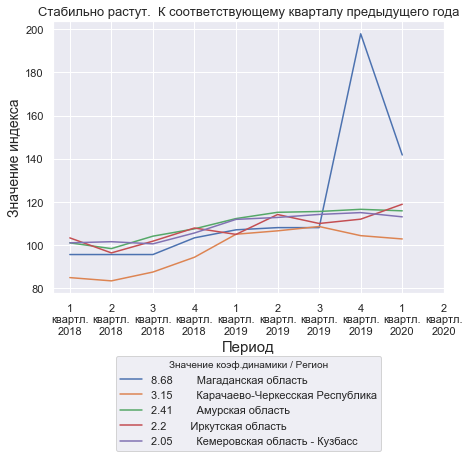

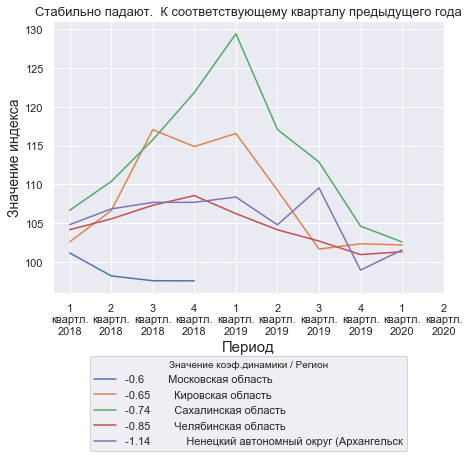

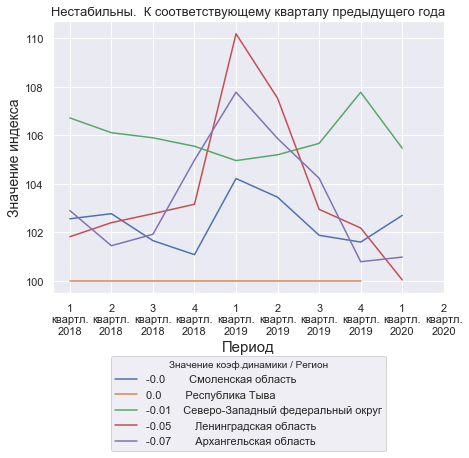

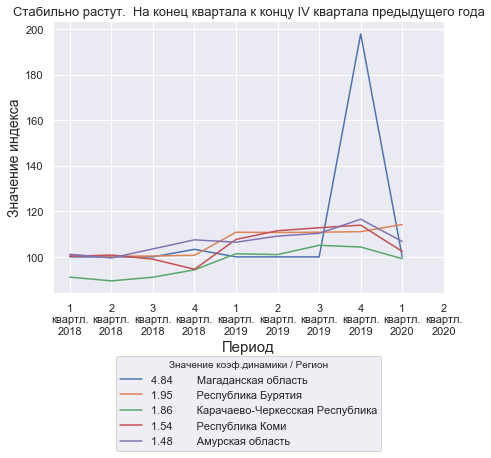

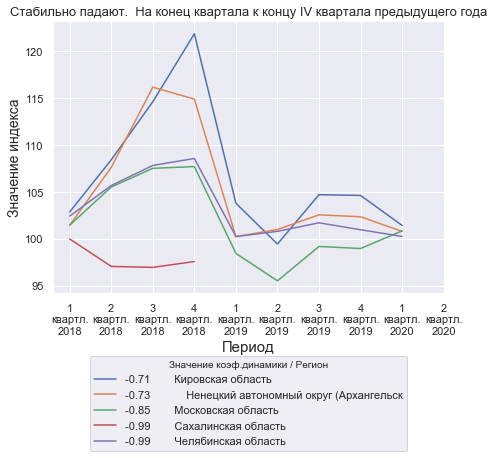

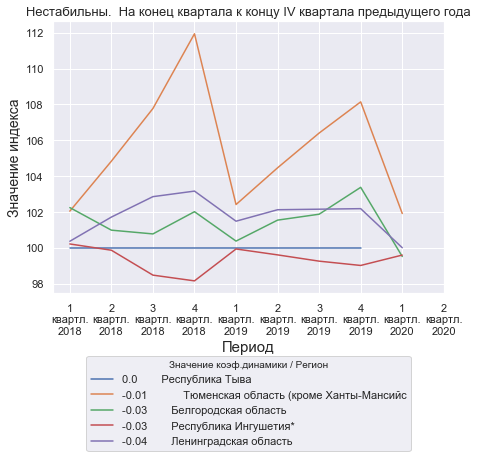

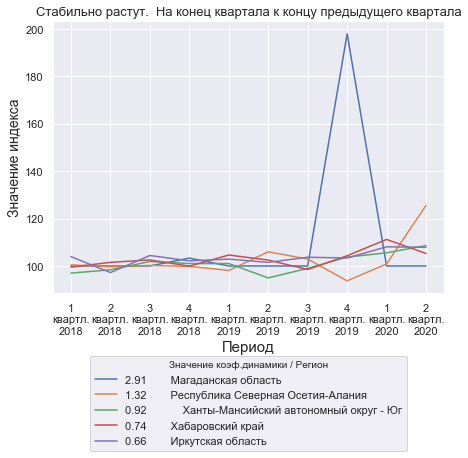

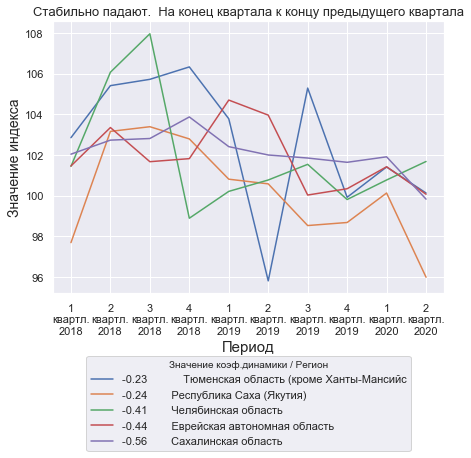

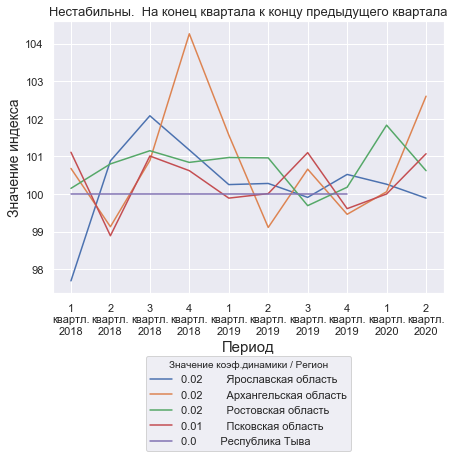

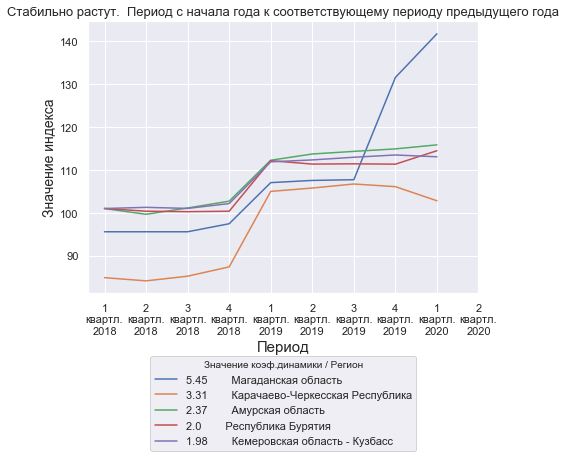

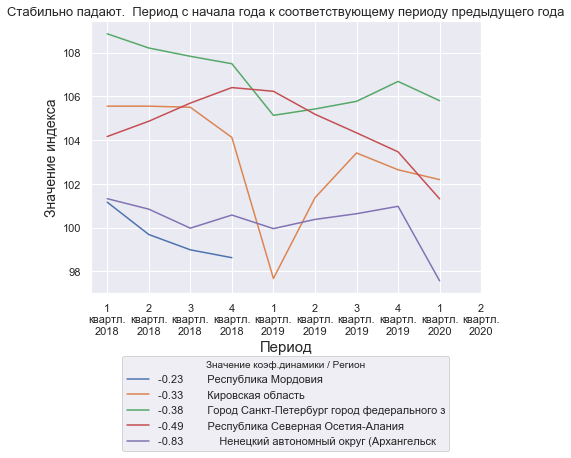

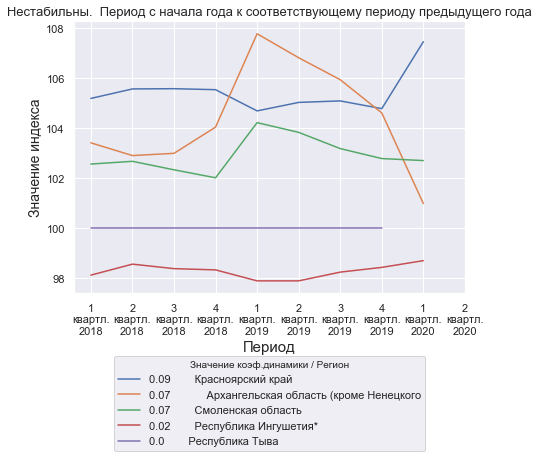

In [1619]:
# Динамика через регрессию
def linregress(x, y, w=None, b=None):
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    if w is None:
        w = np.ones(x.size, dtype=np.float64)
    wxy = np.sum(w*y*x)
    wx = np.sum(w*x)
    wy = np.sum(w*y)
    wx2 = np.sum(w*x*x)
    sw = np.sum(w)
    den = wx2*sw - wx*wx
    if den == 0:
        den = np.finfo(np.float64).eps
    if b is None:
        k = (sw*wxy - wx*wy) / den
        b = (wy - k*wx) / sw
    else:
        k = (wxy - wx*b) / wx2
    return k, b

# Считаем динамику индексов
def f(df_f):
    #Множество типов индексов
    types_of_price_index=['К соответствующему кварталу предыдущего года',
                                   'На конец квартала к концу IV квартала предыдущего года',
                                   'На конец квартала к концу предыдущего квартала',
                                   'Период с начала года к соответствующему периоду предыдущего года']
    #Готовим фрейм который отдадим из функции
    df_return= pd.DataFrame(index=types_of_price_index,
                           columns=['coef_dinamic_index'])
    #Ищем коэфициент динамики изменения для кажого типа индекса
    for t in types_of_price_index:
        price_index=df_f[df_f.Price_index==t].values
        #Берем значения индексов откидывая название области и типа индекса
        index_meaning=price_index[0][2:]
    
        #Убираем nan если есть
        to_del=[]
        for i in range(len(index_meaning)):
            if (np.isnan(index_meaning[i])):
                to_del.append(i)
        index_meaning = np.delete(index_meaning, to_del)
        # Ищем коэф регресии
        lin_reg=linregress(range(len(index_meaning)),index_meaning)
        # Запись ответа. Пишем коэф K (kx+b)
        df_return.loc[t,'coef_dinamic_index']=round(lin_reg[0],2)
    
    return df_return

df_dinamic_index=df_first_market_Flat_type_all.groupby('Location').apply(func=f)

# Уйдем от мульти индлекса
df_dinamic_index=df_dinamic_index.reset_index()
df_dinamic_index=df_dinamic_index.rename(columns={'level_1':'Price_index'})
df_dinamic_index

# Это для заголовка и сохранения
tipe=-1
# Построим графики
types_of_price_index=['К соответствующему кварталу предыдущего года',
                                   'На конец квартала к концу IV квартала предыдущего года',
                                   'На конец квартала к концу предыдущего квартала',
                                   'Период с начала года к соответствующему периоду предыдущего года']
for types in range(len(types_of_price_index)):
    # Соберем топ 5 растущих, убывающих и нестабильных в ДАННОМ ТИПЕ ИНДЕКСА
    top5_rise=df_dinamic_index[df_dinamic_index.Price_index==types_of_price_index[types]].sort_values(by='coef_dinamic_index',ascending=False).head(5)
    top5_crash=df_dinamic_index[df_dinamic_index.Price_index==types_of_price_index[types]].sort_values(by='coef_dinamic_index').head(5)
    
    # Ищем не стабильные. У них постоянные скачки. Коэф будет около 0. А значит это в середине 
    to_find_center_for_nonstable=df_dinamic_index[df_dinamic_index.Price_index==types_of_price_index[types]].sort_values(by='coef_dinamic_index',
                                                                                            ascending=False).reset_index().drop(columns=['index'])
    # Приводим тип для запроса с отрицательным значением
    to_find_center_for_nonstable['coef_dinamic_index'] = to_find_center_for_nonstable['coef_dinamic_index'].astype(float)
    # Берем маленькую выборку где почти ноль
    to_find_center_for_nonstable=to_find_center_for_nonstable.query('coef_dinamic_index>(-0.1) & coef_dinamic_index<0.1')
    # Скидываем индекс фрейма для поиска центре, где почти ноль. Чтобы взять только 5 значений для графика
    to_find_center_for_nonstable=to_find_center_for_nonstable.reset_index().drop(columns=['index'])
    center_non_stable=round(len(to_find_center_for_nonstable)/2)
    top5_nonstable=to_find_center_for_nonstable.loc[center_non_stable-2:center_non_stable+2]
    
    #Формируем данные для графика
    #Цикл для трех топ пятерок
    for top5_ in [top5_rise,top5_crash,top5_nonstable]:
        all_data=pd.merge(top5_,df_first_market_Flat_type_all, 'left', right_on = ["Price_index","Location"],left_on = ["Price_index","Location"])
        all_data=all_data.sort_values(by='coef_dinamic_index',ascending=False)

        #Делаем для легенды. Значение коэф и название региона     
        for_labels=all_data[['coef_dinamic_index','Location']].values
        labels=[]
        for l in range(len(for_labels)):
            if(len(for_labels[l][1])>50):labels.append(str(for_labels[l][0])+str(for_labels[l][1][0:50])) 
            else: labels.append(str(for_labels[l][0])+str(for_labels[l][1])) 

        all_data=all_data.drop(columns=['coef_dinamic_index','Price_index'])

        fig, axes = plt.subplots(figsize = (7,5))

        for i in range(len(all_data)):
                       y_to_plot=all_data.loc[[i]].values[0][1:]
                       plt.plot((range(len(y_to_plot))), y_to_plot)

        axes.set_xlabel('Период',fontsize=15)
        #  Устанавливаем позиции тиков:
        axes.set_xticks(range(len(y_to_plot)))
        #  Устанавливаем подписи тиков
        axes.set_xticklabels(['1\nквартл.\n2018', '2\nквартл.\n2018', '3\nквартл.\n2018', '4\nквартл.\n2018',
                             '1\nквартл.\n2019', '2\nквартл.\n2019', '3\nквартл.\n2019', '4\nквартл.\n2019',
                             '1\nквартл.\n2020', '2\nквартл.\n2020'])
        
        tipe=tipe+1
        tipe_trand=['Стабильно растут.  ',
                    'Стабильно падают.  ',
                    'Нестабильны.  ']
        if (tipe==3):tipe=0
        if (tipe==0):tipe_trand=tipe_trand[0]
        if (tipe==1):tipe_trand=tipe_trand[1]
        if (tipe==2):tipe_trand=tipe_trand[2]
        title=str(tipe_trand)+types_of_price_index[types]
        plt.title(title,fontsize=13)
        axes.set_ylabel('Значение индекса',fontsize=14)
        plt.legend(labels,title ='Значение коэф.динамики / Регион',loc='lower center', bbox_to_anchor=(0.5, -0.60))
        plt.show()
        fig.savefig('img_RW/тренды недвижимости/3_вопрос_первичка_динамика(регрессия)/ГРАФИК_'+title+'.png',bbox_inches='tight')



In [1621]:
# Лидер. быстрее всего меняется индекс 
print('Период с начала года к соответствующему периоду предыдущего года')
print('Лидер - Магаданская область')
lider_first_maarket=df_first_market_Flat_type_all.query('Location=="        Магаданская область" & Price_index=="Период с начала года к соответствующему периоду предыдущего года"')
print('Измнился индекс с 2018_1_quarter на момент 2020_1_quarter на',
      round(lider_first_maarket['2020_1_quarter'].values[0]-lider_first_maarket['2018_1_quarter'].values[0],2))


tekusch=lider_first_maarket['2020_1_quarter'].values[0]
bazov=lider_first_maarket['2018_1_quarter'].values[0]
print('\nИндекс Роста: ',
     round((tekusch/bazov),2),
     '\nИндекс прироста: ',
     round((tekusch-bazov)/bazov*100,2),'%')

Период с начала года к соответствующему периоду предыдущего года
Лидер - Магаданская область
Измнился индекс с 2018_1_quarter на момент 2020_1_quarter на 46.13

Индекс Роста:  1.48 
Индекс прироста:  48.26 %


# 4) В каком классе (тип квартир) и на какой % сильнее всего изменилась стоимость на первичное жилье?

In [1624]:
# Убираем строки "Все типы квартир"
df_first_market_Flat_type_without_all=df_first_market.drop(df_first_market.query('Flat_type=="Все типы квартир"').index)
# Убираем три лишних индекса
df_first_market_Flat_type_without_all=df_first_market_Flat_type_without_all.query('Price_index=="Период с начала года к соответствующему периоду предыдущего года"').drop(columns='Price_index')
df_first_market_Flat_type_without_all                                       

,Location,Flat_type,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
2809,Российская Федерация,Квартиры среднего качества (типовые),102.94,103.09,103.33,103.63,105.64,106.3,106.96,107.36,106.93,NaN
2810,Российская Федерация,Улучшенного качества,102.32,103.12,104.17,105.07,108.54,108.04,108.09,107.86,106.52,NaN
2811,Российская Федерация,Элитные квартиры,100.61,100.88,102.19,102.37,102.77,104.28,104.64,106.06,106.57,NaN
2813,Центральный федеральный округ,Квартиры среднего качества (типовые),102.12,101.56,101.39,101.48,103.66,105.98,108,108.48,108.59,NaN
2814,Центральный федеральный округ,Улучшенного качества,102.29,103.66,105.03,105.97,110.44,108.86,108.57,108.12,105.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3143,Амурская область,Улучшенного качества,99.06,99.38,99.91,102.27,106.1,106.71,107.74,110.34,125.75,NaN
3145,Магаданская область,Улучшенного качества,95.58,95.58,95.58,97.45,107.03,107.54,107.71,131.53,141.71,NaN
3147,Сахалинская область,Квартиры среднего качества (типовые),98.73,99.48,100.19,100.79,99.68,98.42,103.47,105.91,107.49,NaN
3148,Сахалинская область,Улучшенного качества,108,110.06,112.78,115.88,134.2,127.03,121.87,116.66,102.5,NaN


 Проверим целлостность данных

In [1626]:
print('Типы квартир: ',df_first_market_Flat_type_without_all.Flat_type.unique(),
      '\nКол-во типов квартир: ',df_first_market_Flat_type_without_all.Flat_type.nunique(),'\n',
      '\nТипы регионов: ',df_first_market_Flat_type_without_all.Location.unique()[0:10], 'и т.д.',
      '\nКол-во типов регионов: ',df_first_market_Flat_type_without_all.Location.nunique(),'\n',
      '\nОжидалось строк:',3*94,
     '\nСтрок в фрейме',df_first_market_Flat_type_without_all.index.nunique())

Типы квартир:  ['Квартиры среднего качества (типовые)' 'Улучшенного качества'
 'Элитные квартиры'] 
Кол-во типов квартир:  3 
 
Типы регионов:  ['Российская Федерация' '    Центральный федеральный округ'
 '        Белгородская область' '        Брянская область'
 '        Владимирская область' '        Воронежская область'
 '        Ивановская область' '        Калужская область'
 '        Костромская область' '        Курская область'] и т.д. 
Кол-во типов регионов:  94 
 
Ожидалось строк: 282 
Строк в фрейме 247


In [1629]:
# Ищем проблемные регионы
loc=df_first_market_Flat_type_without_all.Location.unique()
problems_name=[]
problems_lenght=[]
for l in loc:
      if len(df_first_market_Flat_type_without_all[df_first_market_Flat_type_without_all['Location']==str(l)][['Location']])!=4:
        index=df_first_market_Flat_type_without_all[df_first_market_Flat_type_without_all['Location']==str(l)].index
        name=df_first_market_Flat_type_without_all[df_first_market_Flat_type_without_all['Location']==str(l)].loc[index[0],'Location']
        lenght=len(df_first_market_Flat_type_without_all[df_first_market_Flat_type_without_all['Location']==str(l)])
        problems_name.append(name)
        problems_lenght.append(lenght)
problems_name=pd.DataFrame(problems_name, columns=['Location'])
problems_lenght=pd.DataFrame(problems_lenght, columns=['count'])
problems=pd.concat([problems_name, problems_lenght], axis=1)
problems

,Location,count
0,Российская Федерация,3
1,Центральный федеральный округ,3
2,Белгородская область,3
3,Брянская область,3
4,Владимирская область,1
...,...,...
89,Хабаровский край,2
90,Амурская область,2
91,Магаданская область,1
92,Сахалинская область,2


Много проблемных регионов. Меньше 4. Значит отсутствует инфо каком-то типе квартир <br>
А вот больше 4 - ДУБЛИРОВАНИЕ ИНФОРМАЦИИ

In [1630]:
problems.query('count >4')

,Location,count
72,Сибирский федеральный округ,6
83,Дальневосточный федеральный округ,6


In [1632]:
 # Собираем все строки в одни с верными значениям
def fix(df_to_fix):
    first=df_to_fix.loc[df_to_fix.index[0]]
    second=df_to_fix.loc[df_to_fix.index[1]]
    # Запоминаем где nan
    to_insted=[]
    for i in range(2,len(list(first))):
        if (np.isnan(list(first)[i])):
            to_insted.append(i)
    new_first=df_to_fix.loc[df_to_fix.index[0]]
    new_first=new_first.values
    # Заменяем nan нормальными значениями
    for i in to_insted:
        new_first[i]=list(second)[i]
    return (new_first[2:])


#ВХОД
# Определяем проблемные локоции которые фиксим
more_4=problems.query('count >4')["Location"].values
for Location_Name in more_4:
    fixed=df_first_market_Flat_type_without_all[df_first_market_Flat_type_without_all['Location']==Location_Name].groupby('Flat_type').apply(func=fix)

    df_buf=pd.DataFrame(fixed,columns=['value'])
    df_buf=df_buf.reset_index()
    df_buf[['2018_1_quarter', '2018_2_quarter', '2018_3_quarter', '2018_4_quarter',
                             '2019_1_quarter', '2019_2_quarter', '2019_3_quarter', '2019_4_quarter',
                             '2020_1_quarter', '2020_2_quarter']] = pd.DataFrame(df_buf.value.values.tolist(), index= df_buf.index)
    df_buf=df_buf.drop(columns=['value'])

    # Процедура замены
    repeats=df_first_market_Flat_type_without_all[df_first_market_Flat_type_without_all['Location']==Location_Name]
    repeats_ind=repeats.index
    # Удаляем дублирующиеся строки 
    df_first_market_Flat_type_without_all=df_first_market_Flat_type_without_all.drop(index=repeats_ind[1::2])
    # Чиним (дозаполняем) оставшиеся строки
    k=0
    for i in repeats_ind[::2]:
        df_first_market_Flat_type_without_all.loc[i, '2018_1_quarter':'2020_2_quarter']=df_buf.loc[k, '2018_1_quarter':'2020_2_quarter']
        k=k+1 # это индекс в буферном датафрейме с верными значениями

In [1635]:
# Проверяем результат 1
df_first_market_Flat_type_without_all[df_first_market_Flat_type_without_all['Location']==more_4[0]]

,Location,Flat_type,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
3076,Сибирский федеральный округ,Квартиры среднего качества (типовые),101.84,102.54,103.32,103.75,107.86,108.34,108.07,108.53,107.21,NaN
3078,Сибирский федеральный округ,Элитные квартиры,102.99,102.39,103.02,103.83,106.81,108.39,108.82,109.07,110.97,NaN
3081,Сибирский федеральный округ,Улучшенного качества,98.05,100.05,101.41,102.25,108.56,111.02,112.2,112.31,112.05,NaN


In [1634]:
# Проверяем результат 2
df_first_market_Flat_type_without_all[df_first_market_Flat_type_without_all['Location']==more_4[1]]

,Location,Flat_type,2018_1_quarter,2018_2_quarter,2018_3_quarter,2018_4_quarter,2019_1_quarter,2019_2_quarter,2019_3_quarter,2019_4_quarter,2020_1_quarter,2020_2_quarter
3116,Дальневосточный федеральный округ,Квартиры среднего качества (типовые),100.41,102.05,103.41,103.81,107.89,109.9,110.49,111.18,116.2,NaN
3118,Дальневосточный федеральный округ,Элитные квартиры,107.52,107.13,107.9,108.49,113.86,113.44,112.71,112.16,111.68,NaN
3121,Дальневосточный федеральный округ,Улучшенного качества,104.89,106.07,106.8,106.3,105.57,104.49,104.28,106.49,111.95,NaN


In [1637]:
# Считаем индекс прироста на вторичке для каждого типа квартиры в каждом регионе
def prirost_ind(df_f):
    #Множество типов индексов
    types_of_flat=df_f.Flat_type.unique()
    #Готовим фрейм который отдадим из функции
    df_return= pd.DataFrame(index=types_of_flat,
                           columns=['prirost_ind'])
    #Ищем коэфициент прироста для кажого типа квартиры
    for t in types_of_flat:
        price_index=df_f[df_f.Flat_type==t].values       
        #Берем значения индексов откидывая название области и типа квартиры
        index_meaning=price_index[0][2:]
        #Убираем nan если есть
        to_del=[]
        for i in range(len(index_meaning)):
            if (np.isnan(index_meaning[i])):
                to_del.append(i)
        index_meaning = np.delete(index_meaning, to_del)  
        
        # Параметры для рассчетка коэф прироса
        bazov=index_meaning[0]
        tekusch=index_meaning[len(index_meaning)-1]
        df_return.loc[t,'prirost_ind']=round((tekusch-bazov)/bazov*100,2)
        
    return df_return
        
df_Priros_ind_first_marcet_Flat_type_without_all=df_first_market_Flat_type_without_all.groupby('Location').apply(func=prirost_ind)
# # Уйдем от мульти индлекса
df_Priros_ind_first_marcet_Flat_type_without_all=df_Priros_ind_first_marcet_Flat_type_without_all.reset_index()
df_Priros_ind_first_marcet_Flat_type_without_all=df_Priros_ind_first_marcet_Flat_type_without_all.rename(columns={'level_1':'Flat_type'})
df_Priros_ind_first_marcet_Flat_type_without_all

,Location,Flat_type,prirost_ind
0,Архангельская область (кроме Ненец...,Квартиры среднего качества (типовые),0.63
1,Архангельская область (кроме Ненец...,Улучшенного качества,-2.44
2,Архангельская область (кроме Ненец...,Элитные квартиры,1.17
3,Ненецкий автономный округ (Арханге...,Улучшенного качества,-2.51
4,Тюменская область (кроме Ханты-Ман...,Квартиры среднего качества (типовые),9.65
...,...,...,...
236,Южный федеральный округ (с 29.07.2016),Улучшенного качества,7.29
237,Южный федеральный округ (с 29.07.2016),Элитные квартиры,10.05
238,Российская Федерация,Квартиры среднего качества (типовые),3.88
239,Российская Федерация,Улучшенного качества,4.1


In [1640]:
# Определяем медиану индекса прироста для каждого типа квартиры
df_Priros_ind_first_marcet_Flat_type_without_all['prirost_ind'] = df_Priros_ind_first_marcet_Flat_type_without_all['prirost_ind'].astype(float)
df_Priros_ind_first_marcet_Flat_type_without_all.groupby('Flat_type',as_index=False).agg({'prirost_ind' : 'median'})

,Flat_type,prirost_ind
0,Квартиры среднего качества (типовые),5.095
1,Улучшенного качества,4.860
2,Элитные квартиры,2.530


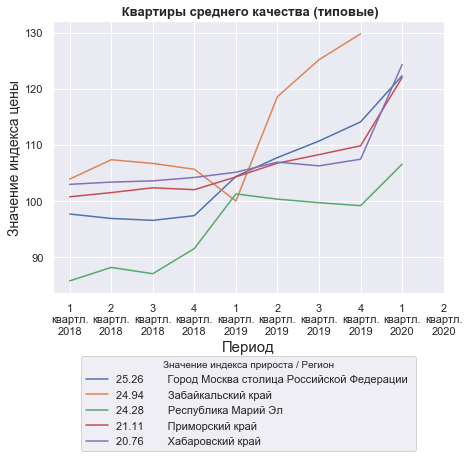

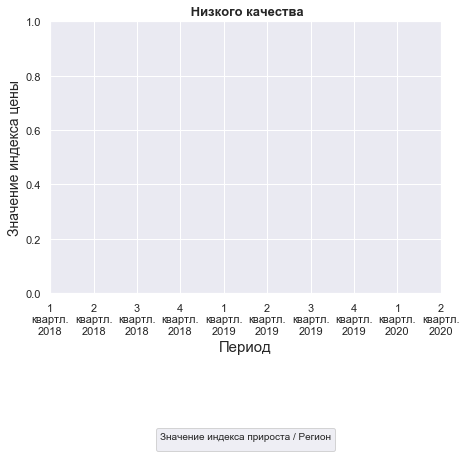

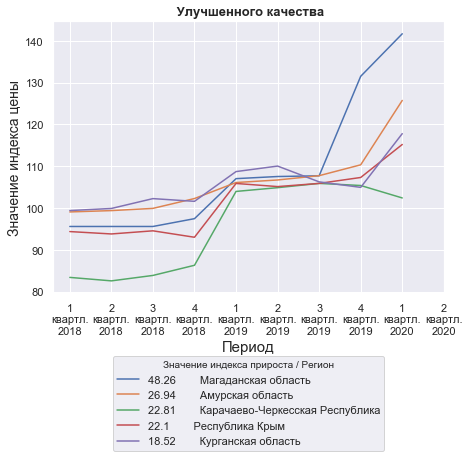

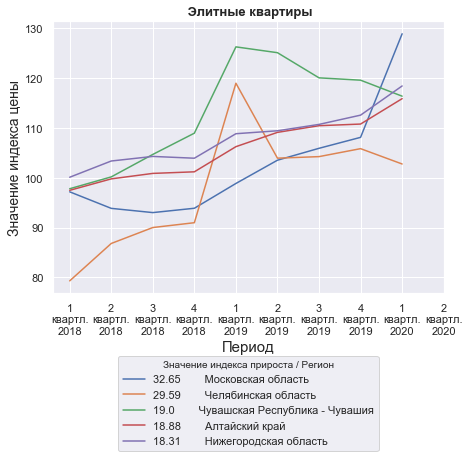

In [1644]:
# Это для заголовка и сохранения
tipe=-1
# Построим графики
types_of_Flat_type=['Квартиры среднего качества (типовые)', 'Низкого качества',
                     'Улучшенного качества', 'Элитные квартиры'] 
for types in range(len(types_of_Flat_type)):
    #Соберем топ 5 растущих, убывающих и нестабильных в ДАННОМ ТИПЕ ИНДЕКСА
    top5_rise=df_Priros_ind_first_marcet_Flat_type_without_all[df_Priros_ind_first_marcet_Flat_type_without_all.Flat_type==types_of_Flat_type[types]].sort_values(by='prirost_ind',ascending=False).head(5)

    
    #Формируем данные для графика
    #Цикл для трех топ пятерок
    for top5_ in [top5_rise]:
        all_data=pd.merge(top5_,df_first_market_Flat_type_without_all, 'left', right_on = ["Flat_type","Location"],left_on = ["Flat_type","Location"])
        all_data=all_data.sort_values(by='prirost_ind',ascending=False)

        #Делаем для легенды. Значение коэф и название региона     
        for_labels=all_data[['prirost_ind','Location']].values
        labels=[]
        for l in range(len(for_labels)):
            if(len(for_labels[l][1])>50):labels.append(str(for_labels[l][0])+str(for_labels[l][1][0:50])) 
            else: labels.append(str(for_labels[l][0])+str(for_labels[l][1])) 

        all_data=all_data.drop(columns=['prirost_ind','Flat_type'])

        fig, axes = plt.subplots(figsize = (7,5))

        for i in range(len(all_data)):
                       y_to_plot=all_data.loc[[i]].values[0][1:]
                       plt.plot((range(len(y_to_plot))), y_to_plot)

        axes.set_xlabel('Период',fontsize=15)
        #  Устанавливаем позиции тиков:
        axes.set_xticks(range(len(y_to_plot)))
        #  Устанавливаем подписи тиков
        axes.set_xticklabels(['1\nквартл.\n2018', '2\nквартл.\n2018', '3\nквартл.\n2018', '4\nквартл.\n2018',
                             '1\nквартл.\n2019', '2\nквартл.\n2019', '3\nквартл.\n2019', '4\nквартл.\n2019',
                             '1\nквартл.\n2020', '2\nквартл.\n2020'])
        
#         tipe=tipe+1
#         tipe_trand=['Стабильно растут.  ',
#                     'Стабильно падают.  ',
#                     'Нестабильны.  ']
#         if (tipe==3):tipe=0
#         if (tipe==0):tipe_trand=tipe_trand[0]
#         if (tipe==1):tipe_trand=tipe_trand[1]
#         if (tipe==2):tipe_trand=tipe_trand[2]
        tipe_trand=''
        title=str(tipe_trand)+str(' ')+types_of_Flat_type[types]
        plt.title(title,fontsize=13,weight="semibold")
        
        axes.set_ylabel('Значение индекса цены',fontsize=14)
        plt.legend(labels,title ='Значение индекса прироста / Регион',loc='lower center', bbox_to_anchor=(0.5, -0.60))
        plt.show()
        fig.savefig('img_RW/тренды недвижимости/4_вопрос_лидеры_по_идексу_прироста_первичка/ГРАФИК_'+title+'.png',bbox_inches='tight')